<a href="https://colab.research.google.com/github/Ichraf-MOUELHI/Etude_de_marche_poulet_Francais_2018-2022/blob/main/IM_clustering_ACP_Corr%C3%A9lation_visualisations_etude_de_march%C3%A9_pouletFR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

from scipy import stats
import seaborn as sns


# **Importation du fichier fusionné en .csv**

In [2]:

# URL vers le fichier CSV hébergés sur GitHub
url_df = 'https://raw.githubusercontent.com/Ichraf-MOUELHI/Etude_de_marche_poulet_Francais_2018-2022/refs/heads/main/df.csv'
# Chargement du fichier directement depuis GitHub
df = pd.read_csv(url_df)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   num_pays                                                             242 non-null    int64  
 1   code_pays                                                            242 non-null    object 
 2   pays                                                                 242 non-null    object 
 3   Dispo_proteine_g_personne_jour                                       242 non-null    float64
 4   person_2021                                                          242 non-null    float64
 5   Taux_change_unit_devises_local_par_$US_Moy_period                    242 non-null    float64
 6   Stabilité_Politique                                                  242 non-null    float64
 7   PIB_par_

In [4]:
# Changer le type de donnée num_pays en object
df['num_pays'] = df['num_pays'].astype(str)

# **Définition des variables**

* **EPI**

L'Environmental Performance Index (EPI), ou Indice de performance environnementale, est un outil utilisé pour évaluer la performance environnementale des pays. Créé par des institutions telles que Yale et Columbia, il se base sur deux axes principaux : la santé environnementale, mesurant l'impact de l'environnement sur la santé humaine, et la vitalité des écosystèmes, qui évalue la protection des écosystèmes et la gestion des ressources naturelles.

L'EPI sert à comparer les performances des pays sur divers aspects environnementaux (pollution de l'air, gestion des déchets, changement climatique), à suivre les progrès et à fournir des recommandations aux décideurs politiques. Les indicateurs clés incluent la qualité de l'air, la gestion de l'eau, la biodiversité, et les émissions de gaz à effet de serre.

Chaque pays reçoit une note sur 100 pour chaque indicateur, avec une pondération pour refléter l'importance des catégories. L'EPI est donc essentiel pour évaluer l'efficacité des politiques environnementales, identifier les domaines à améliorer et suivre les progrès vers les Objectifs de développement durable (ODD).

* **LPI**

Le Logistics Performance Index (LPI) est un indicateur élaboré par la Banque mondiale pour évaluer la performance logistique des pays. Il mesure l'efficacité des flux de marchandises au sein des frontières et au-delà, en s'appuyant sur plusieurs dimensions.

Le score global, compris entre 1 (faible performance) et 5 (excellente performance), reflète différents aspects logistiques tels que :

Efficacité des procédures douanières
Qualité des infrastructures logistiques
Facilité d'expédition internationale
Compétence des services logistiques
Suivi et traçabilité des envois
Fréquence des livraisons à temps
L'objectif du LPI est de permettre la comparaison internationale de la performance logistique, fournissant des informations utiles aux décideurs pour améliorer le commerce et la compétitivité. Les données sont collectées via des enquêtes auprès de professionnels et sont publiées tous les deux ans.

* **Coahd**

L'indicateur Coût et abordabilité d’une alimentation saine (CoAHD) évalue si une population, notamment les plus vulnérables, peut se permettre une alimentation équilibrée respectant les recommandations nutritionnelles. Il se base sur deux aspects principaux :

Coût d’une alimentation saine : Il représente le montant nécessaire pour acheter des aliments nutritifs (fruits, légumes, protéines, etc.) et est calculé sur une base quotidienne ou mensuelle.
Abordabilité : Il compare ce coût au revenu disponible des populations pour déterminer si elles peuvent accéder à une alimentation saine sans compromettre d'autres besoins essentiels (logement, santé, etc.).
Des facteurs comme le prix des denrées alimentaires, le revenu moyen, l'accès aux marchés et les politiques publiques influencent le CoAHD. Cet indicateur est essentiel pour évaluer la sécurité alimentaire, les inégalités économiques, et pour orienter les politiques publiques vers une alimentation plus accessible et abordable.
-> Choix sur l'indicateur cost_animal_source_food (PPP)

* **Governance Effectiveness**

Efficacité du gouvernement : reflète la perception de la qualité des services publics, de la qualité de la fonction publique et de son degré d'indépendance par rapport aux pressions politiques, de la qualité de la formulation et de la mise en œuvre des politiques, et de la crédibilité de l'engagement du gouvernement à l'égard de ces politiques.

* **Inflation**

L'indicateur de l'inflation, mesuré par le pourcentage annuel de variation des prix à la consommation, montre l'évolution des prix des biens et services dans une économie sur une année. Il est basé sur l'Indice des Prix à la Consommation (IPC), qui suit les prix d'un panier fixe de produits représentatifs (alimentation, logement, transport). Un taux positif indique une hausse des prix (inflation), tandis qu'un taux négatif montre une baisse (déflation).

L'inflation, comme dans l'exemple d'un taux de 53%, implique une forte augmentation des prix, une baisse du pouvoir d'achat, et peut signaler de graves déséquilibres économiques. Ce phénomène peut affecter la confiance dans la monnaie et engendrer des crises économiques, telles que l'hyperinflation. Les acteurs économiques doivent alors s'adapter à ces conditions difficiles.

* **Corruption Control**

Contrôle de la corruption : Reflète la perception de la mesure dans laquelle le pouvoir public est exercé à des fins privées, y compris les petites et grandes formes de corruption, ainsi que la « capture » de l'État par les élites et les intérêts privés.

* **PIB par habitant (unités de devises locales constantes)** (sur taux de change en euros pour pouvoir comparer)

Le PIB par habitant est un indicateur économique qui mesure la valeur des biens et services produits dans un pays sur une période donnée, divisée par le nombre d'habitants. Il permet d'évaluer la richesse et la prospérité économique par personne. Un PIB par habitant élevé et un fort pouvoir d'achat font d'un pays un marché attractif.


* **Stabilité Politique**


L'indicateur "Stabilité politique et absence de violence/terrorisme", développé par la Banque mondiale, évalue la probabilité qu'un gouvernement soit déstabilisé ou renversé par des moyens violents, y compris le terrorisme. Il se concentre sur deux aspects :

Stabilité politique : mesure la perception de la durabilité du gouvernement, c'est-à-dire sa capacité à rester en place sans faire face à des troubles majeurs comme des coups d'État ou des révolutions.
Violence et terrorisme : évalue la prévalence de la violence politique, y compris les actes de terrorisme et les conflits internes.
Cet indice est noté de -2,5 à +2,5, où +2,5 indique une forte stabilité et une quasi-absence de violence, et -2,5 reflète une grande instabilité accompagnée d'une forte prévalence de violence et de terrorisme.

* **Quantité de production du poulet**

L'indicateur "Quantité production poulet (tonnes)" représente le volume total de viande de poulet produite sur une période donnée, exprimée en tonnes. Cet indicateur mesure la quantité de poulet transformée et prête pour la consommation, incluant l'élevage, l'abattage et la transformation des volailles. Il est utilisé pour évaluer la capacité de production d'un pays, d'une région ou d'une entreprise dans le secteur avicole, et sert à analyser des aspects tels que l'approvisionnement alimentaire, la compétitivité de l'industrie, et les dynamiques du marché des produits avicoles.

* **Taux de change**

Le taux de change officiel représente le prix d'une monnaie nationale par rapport au dollar américain. Cet indicateur exprime combien d'unités de la monnaie locale sont nécessaires pour obtenir un dollar, calculé en moyenne sur une période donnée (mois ou année). Il sert à suivre la valeur relative d'une monnaie, analyser sa stabilité ou ses fluctuations, et aider les décideurs économiques à évaluer l'impact des taux de change sur le commerce, l'investissement et d'autres aspects économiques. Les variations monétaires influencent aussi le coût et la compétitivité des exportations.


* **Population**

La population totale est basée sur la définition de facto de la population, qui compte tous les résidents, quel que soit leur statut juridique ou leur citoyenneté. Les valeurs indiquées sont des estimations de mi-année.

* **Disponibilité en Proteine**

L'indicateur "Disponibilité alimentaire en protéines" mesure la quantité de protéines alimentaires disponible pour la consommation par habitant, généralement exprimée en grammes par personne et par jour. Il évalue l'accès aux sources de protéines, telles que la viande, le poisson, les produits laitiers, et les légumineuses.

Les facteurs influençant cet indicateur comprennent la production locale, les importations, les politiques agricoles et les conditions économiques. Il est essentiel pour évaluer la sécurité alimentaire et la nutrition des populations, identifier les besoins en améliorations nutritionnelles, et comparer la situation nutritionnelle entre différentes régions.

# **Analyse des variables**
## **Etude des outliers**

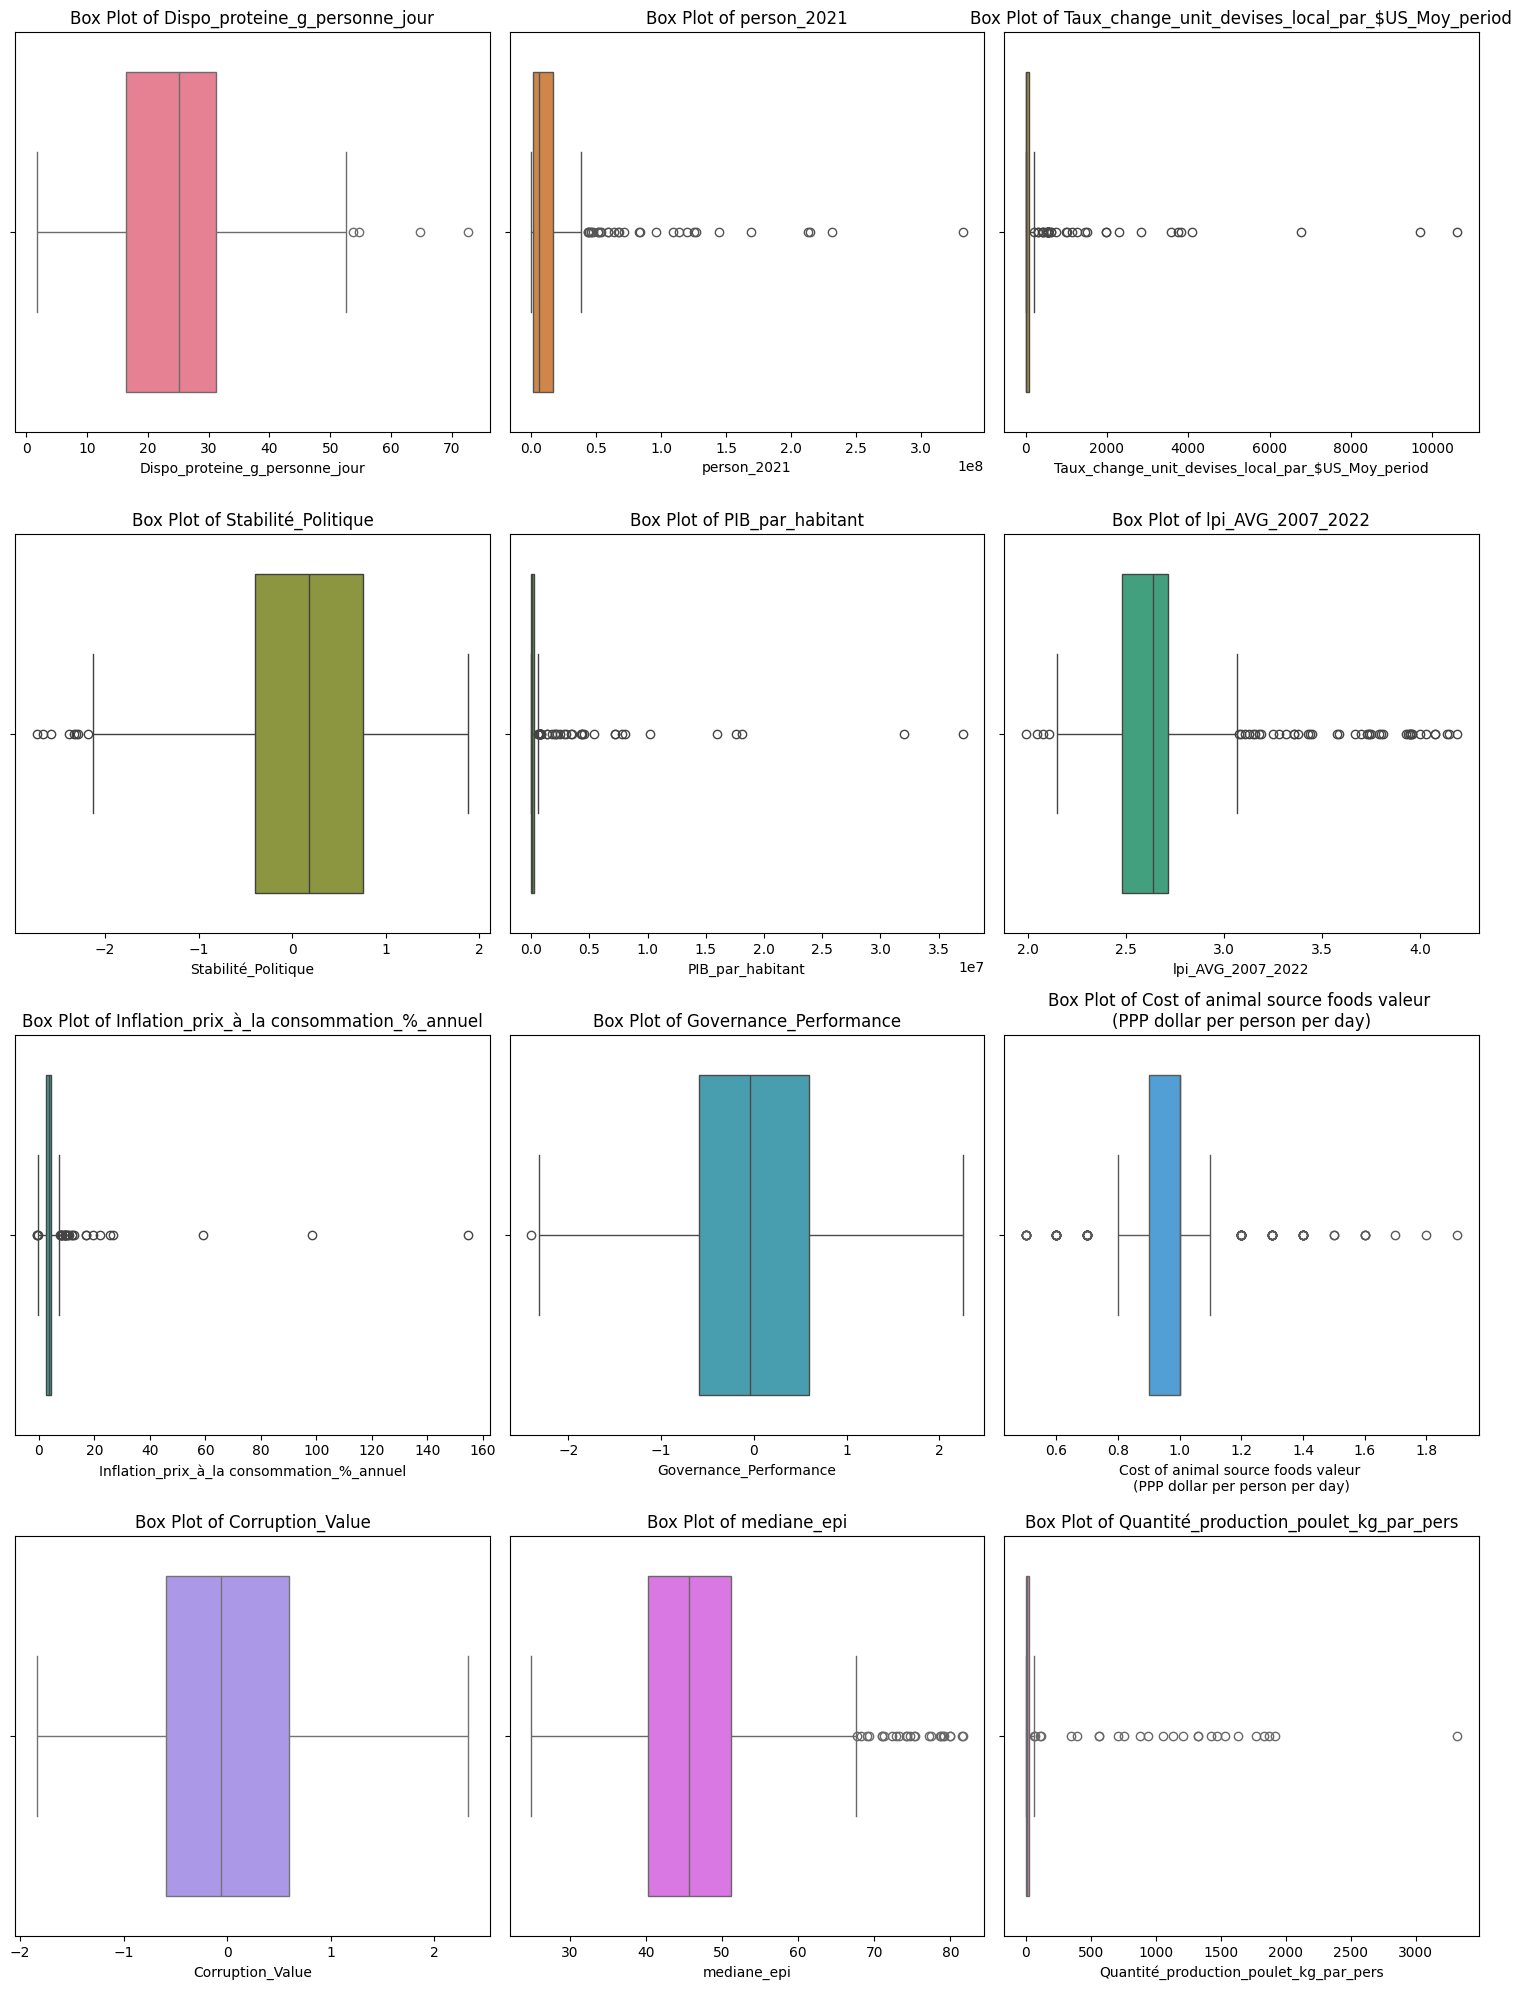

In [5]:
# Création des boites à moustache
# Select numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

# Calculate grid dimensions
num_cols = 3
num_rows = int(np.ceil(len(numeric_cols) / num_cols))

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Choose a Seaborn color palette
palette = sns.color_palette("husl", len(numeric_cols))  # Example: "husl" palette

# Iterate and create box plots with colors from the palette
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i], color=palette[i])  # Use color from palette
    axes[i].set_title(f"Box Plot of {col}")

# Hide unused subplots
for i in range(len(numeric_cols), len(axes)):
    axes[i].set_visible(False)

# Adjust layout and display
plt.tight_layout()
plt.show()

# **LISTE DES OUTLIERS**

In [6]:
import pandas as pd
import numpy as np

def get_outlier_countries(df, column):
    """
    Identifies outlier countries for a specific column in a DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.
        column (str): The name of the column to analyze.

    Returns:
        list: A list of countries identified as outliers.
    """
    # Calculate IQR (Interquartile Range)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define upper and lower bounds for outliers
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    # Identify outlier countries
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_countries = outliers['pays'].tolist()  # Assuming 'Zone' column contains country names

    return outlier_countries

# Columns for which we find outliers
columns_to_analyze = ['Dispo_proteine_g_personne_jour', 'person_2021', 'Taux_change_unit_devises_local_par_$US_Moy_period',
                       'Stabilité_Politique', 'PIB_par_habitant',
                      'lpi_AVG_2007_2022', 'Inflation_prix_à_la consommation_%_annuel', 'Governance_Performance', 'Corruption_Value', 'mediane_epi', 'Quantité_production_poulet_kg_par_pers', 'Cost of animal source foods valeur \n(PPP dollar per person per day)']  # Add other columns as needed

# Create an empty dictionary to store outlier countries for each column
outlier_data = {}

# Loop through columns and get outlier countries
for column in columns_to_analyze:
    outlier_countries = get_outlier_countries(df, column)
    outlier_data[column] = outlier_countries

# Get the maximum length of outlier lists
max_len = max(len(value) for value in outlier_data.values())

# Pad shorter lists with None to make them equal length
for key, value in outlier_data.items():
    if len(value) < max_len:
        outlier_data[key] = value + [None] * (max_len - len(value))

# Create a DataFrame from the outlier data
outlier_df = pd.DataFrame(outlier_data)

# Display the DataFrame
print(outlier_df)

   Dispo_proteine_g_personne_jour     person_2021  \
0                       Argentine  Afrique du Sud   
1                       Hong Kong         Algérie   
2                        Mongolie       Allemagne   
3                           Nauru       Argentine   
4                            None      Bangladesh   
..                            ...             ...   
75                           None            None   
76                           None            None   
77                           None            None   
78                           None            None   
79                           None            None   

   Taux_change_unit_devises_local_par_$US_Moy_period Stabilité_Politique  \
0                                             Angola                Irak   
1                                            Arménie               Libye   
2                                       Burkina Faso                Mali   
3                                            Burundi       

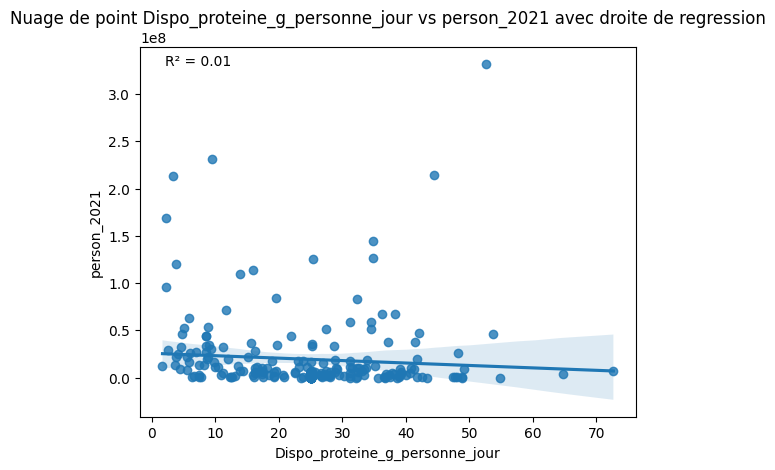

In [7]:
# Nuage de point avec droite de regression
sns.regplot(x='Dispo_proteine_g_personne_jour', y='person_2021', data=df)
plt.title('Nuage de point Dispo_proteine_g_personne_jour vs person_2021 avec droite de regression')

# Afficher le coefficient de détermination R²
# Calculer la corrélation
correlation = df['Dispo_proteine_g_personne_jour'].corr(df['person_2021'])

# Calculer R²
r_squared = correlation**2

# Afficher R² sur le graphique
plt.text(0.05, 0.95, f"R² = {r_squared:.2f}", transform=plt.gca().transAxes)


plt.show()

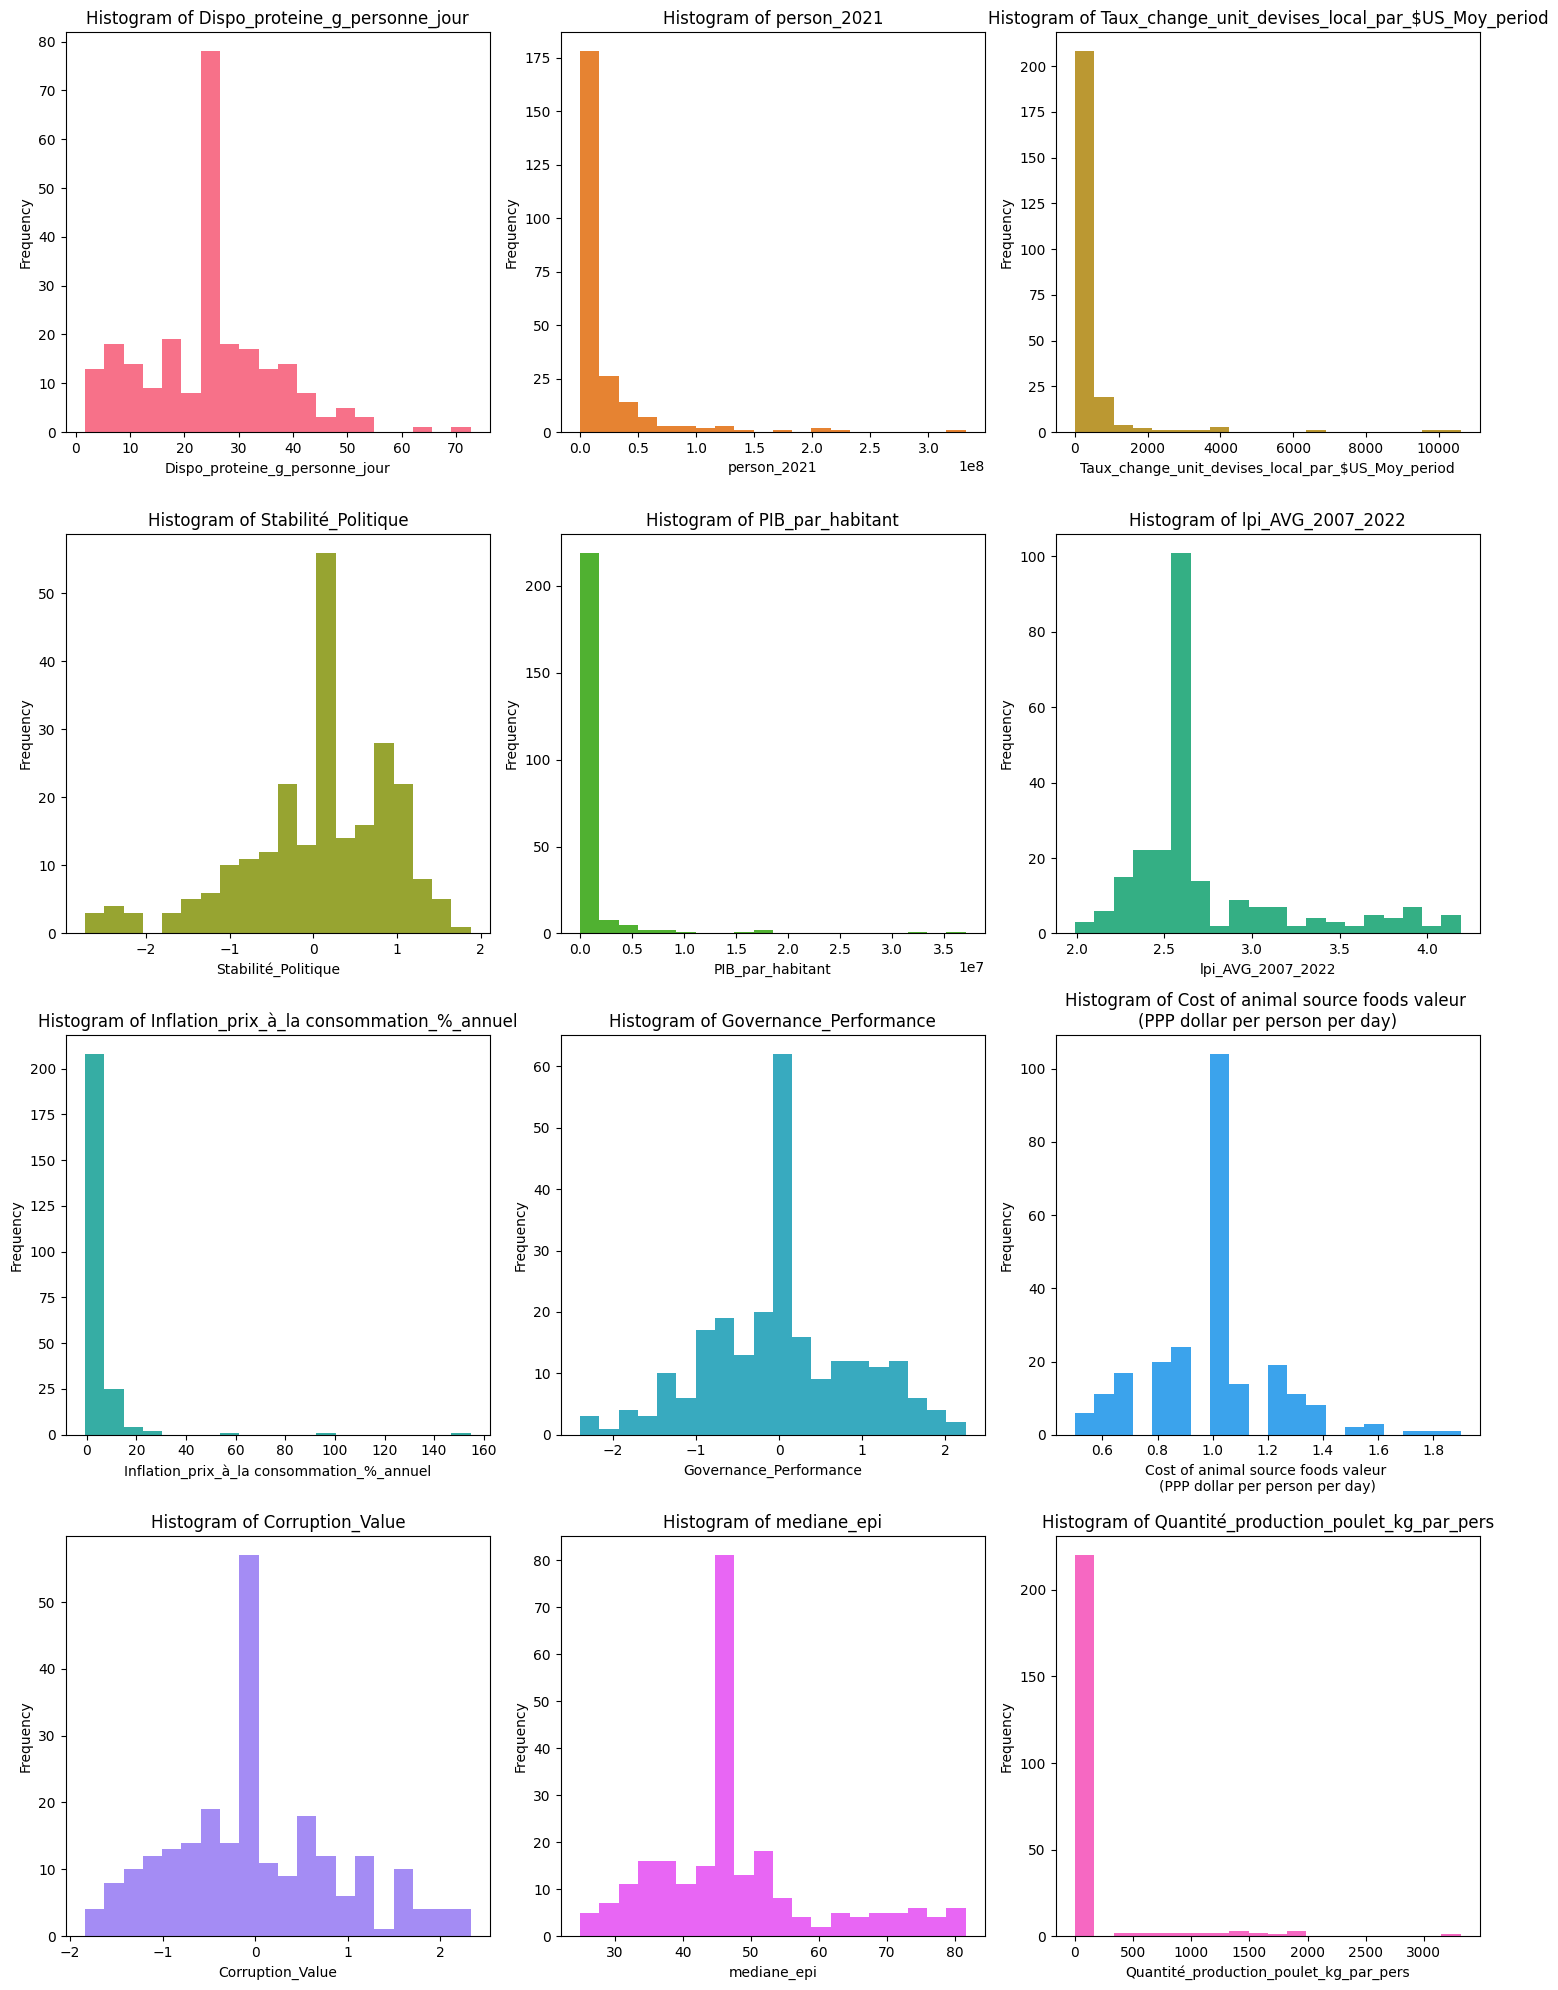

In [8]:
# Histogramme
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Select numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

# Calculate grid dimensions
num_cols = 3
num_rows = int(np.ceil(len(numeric_cols) / num_cols))

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Choose a Seaborn color palette
palette = sns.color_palette("husl", len(numeric_cols))  # Example: "husl" palette

# Iterate and create histograms with colors from the palette
for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col], bins=20, color=palette[i])  # Use color from palette
    axes[i].set_title(f"Histogram of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Hide unused subplots
for i in range(len(numeric_cols), len(axes)):
    axes[i].set_visible(False)

# Adjust layout and display
plt.tight_layout()
plt.show()

# **Matrice de corrélation**

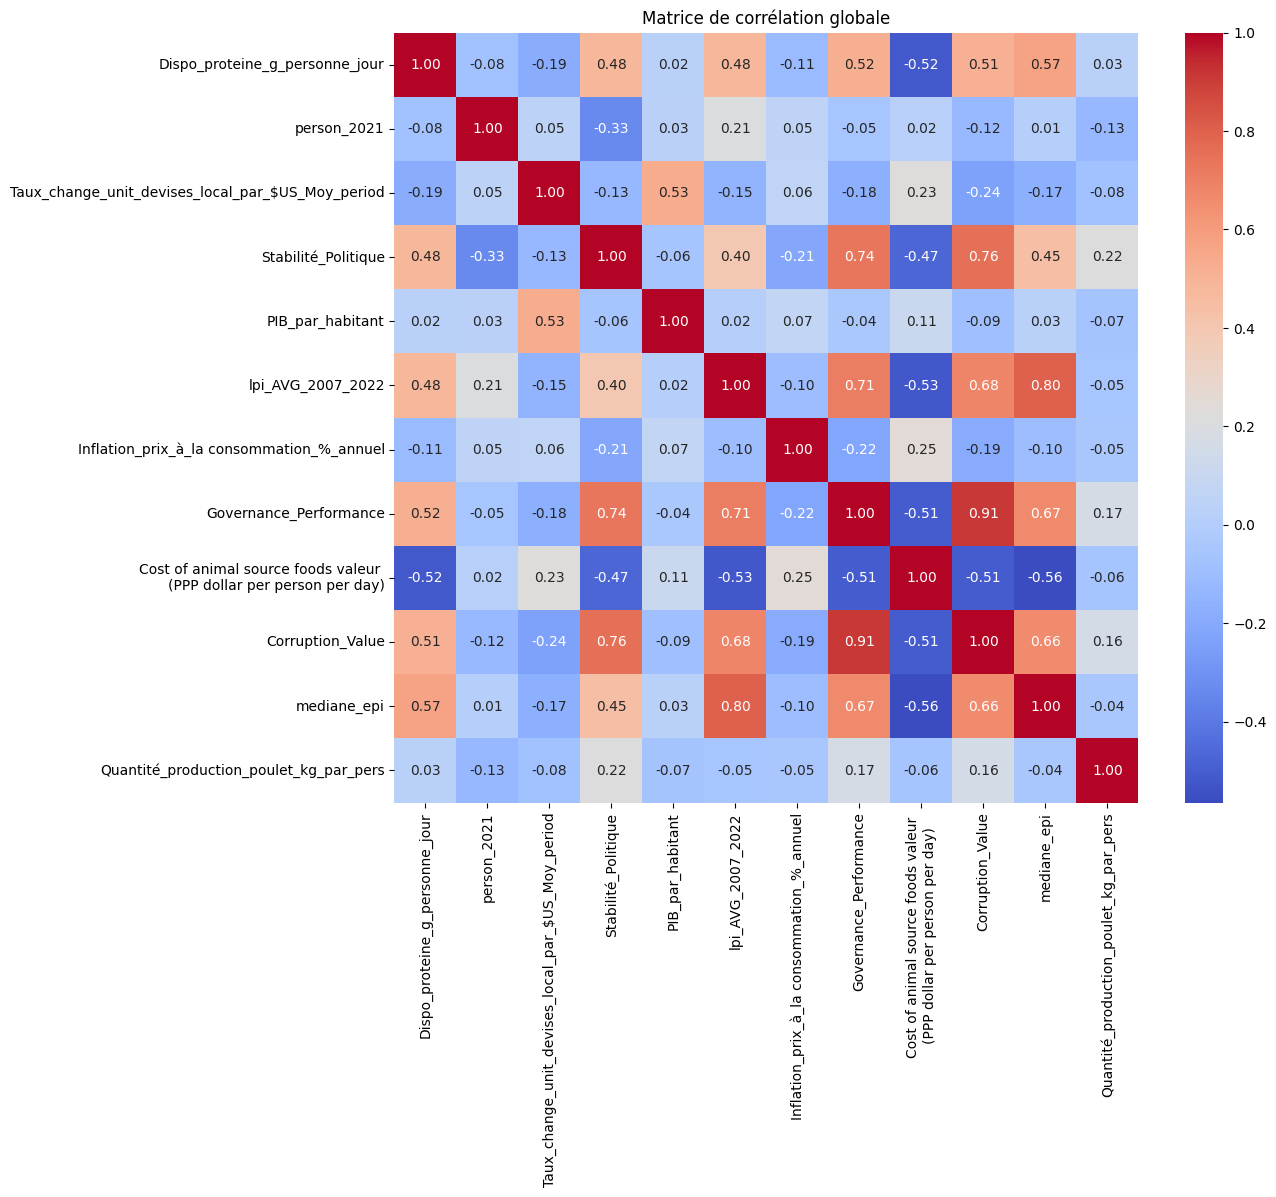

In [9]:
# 1. Select relevant columns for correlation analysis (excluding country-specific columns)
variables = df.drop(columns=['num_pays', 'code_pays', 'pays'])

# 2. Calculate the correlation matrix
correlation_matrix = variables.corr()

# 3. Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation globale')
plt.show()

# **Test de corrélation**
P-valeur à ajouter dans la matrice pour savoir si la corrélation est significative ou non.

* Afficher (S) Significative : pour p-valeur < 0.05.

* Afficher (NS) Non Significative : pour p-valeur > 0.05


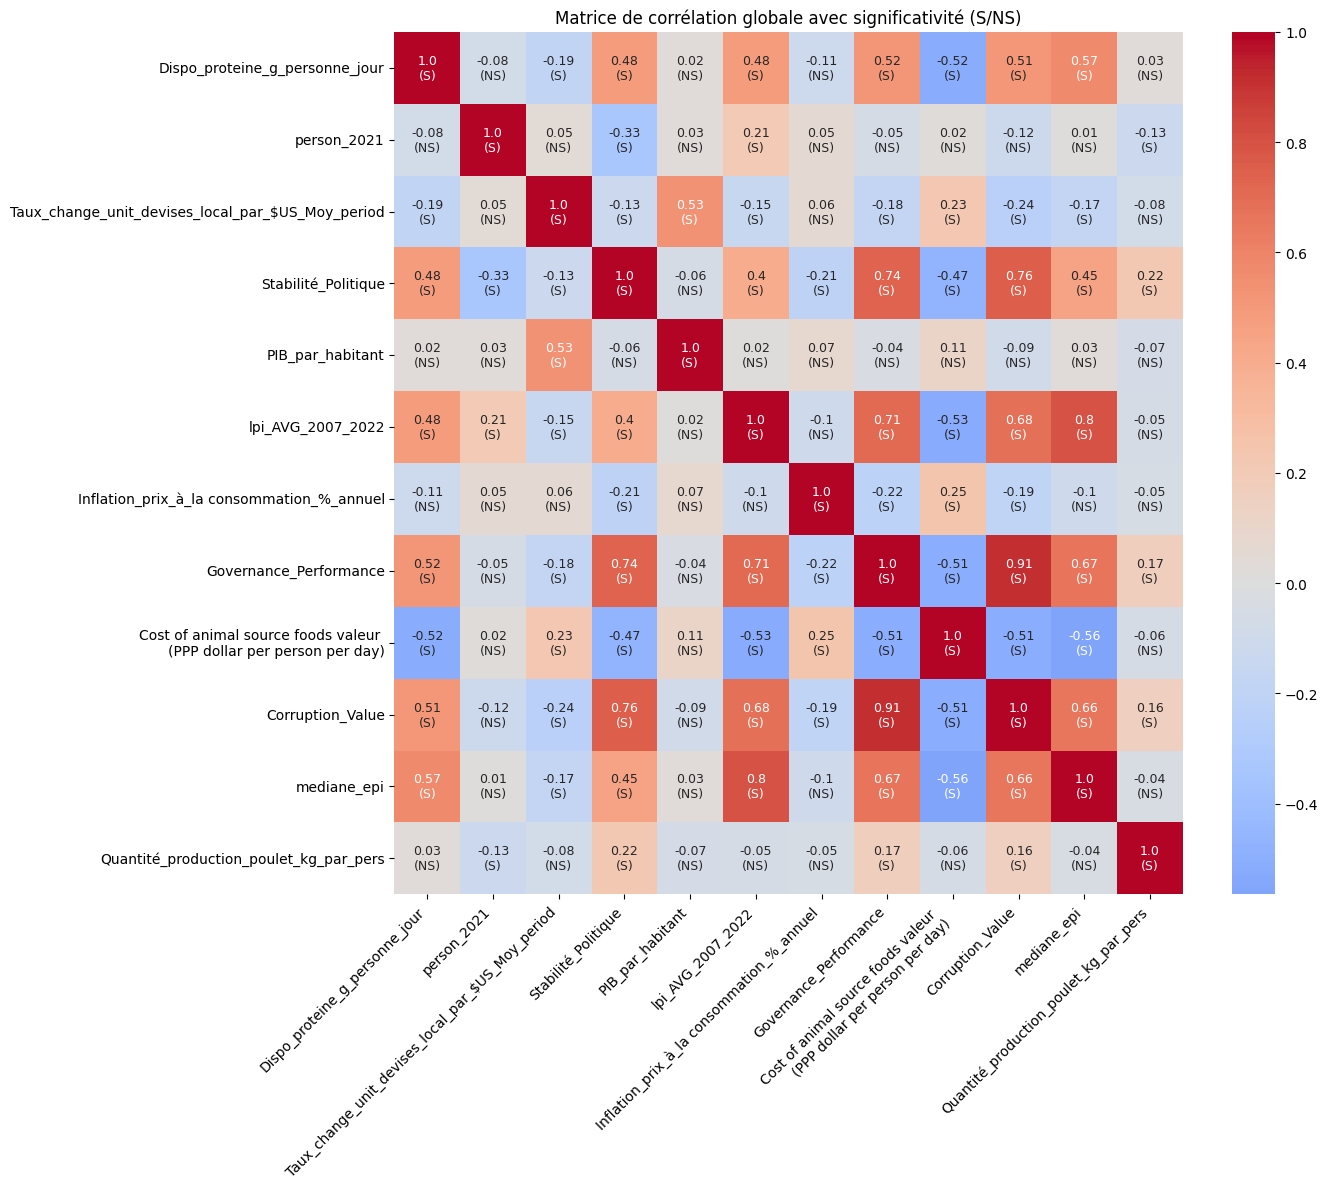

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 1. Select relevant columns for correlation analysis (excluding country-specific columns)
variables = df.drop(columns=['num_pays', 'code_pays', 'pays'])

# 2. Function to calculate both correlation coefficients and significance (S/NS)
def correlation_with_significance(df, significance_level=0.05):
    cols = df.columns
    corr_matrix = pd.DataFrame(index=cols, columns=cols)
    significance_matrix = pd.DataFrame(index=cols, columns=cols)

    for i in range(len(cols)):
        for j in range(i, len(cols)):
            if i == j:
                corr_matrix.iloc[i, j] = 1.0
                significance_matrix.iloc[i, j] = 'S'  # Diagonal is always fully correlated
            else:
                corr, pval = pearsonr(df[cols[i]], df[cols[j]])
                corr_matrix.iloc[i, j] = corr
                corr_matrix.iloc[j, i] = corr
                # Mark 'S' if p-value <= significance level, otherwise 'NS'
                significance_label = 'S' if pval <= significance_level else 'NS'
                significance_matrix.iloc[i, j] = significance_label
                significance_matrix.iloc[j, i] = significance_label

    return corr_matrix.astype(float), significance_matrix

# 3. Calculate the correlation matrix and significance matrix
correlation_matrix, significance_matrix = correlation_with_significance(variables)

# 4. Create a custom annotation matrix combining correlation and significance labels
annot_matrix = correlation_matrix.round(2).astype(str) + "\n(" + significance_matrix + ")"

# 5. Set up plot size and font size for better readability
plt.figure(figsize=(14, 12))  # Adjust the figure size as necessary
sns.heatmap(
    correlation_matrix.astype(float),
    annot=annot_matrix,
    fmt="",
    cmap='coolwarm',
    center=0,
    cbar=True,
    annot_kws={"size": 9}  # Font size for annotations
)
plt.title('Matrice de corrélation globale avec significativité (S/NS)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.yticks(rotation=0)                # Keep y-axis labels horizontal
plt.tight_layout()                    # Adjust layout for a snug fit
plt.show()


# **Matrice de Correlation et Relations entre les variables :**

La matrice de corrélation montre la force et le sens des relations entre les différentes variables étudiées (ex : EPI, LPI, Coût des aliments, Stabilité politique, etc.).

Les valeurs :
* **Positives (rouge) :** Relation directe (si une variable augmente, l’autre augmente).
* **Négatives (bleu) :** Relation inverse (si une variable augmente, l’autre diminue).

* Les annotations (S) et (NS) montrent si la corrélation est statistiquement significative ou non.

Relations importantes à noter :

* **EPI et PIB par habitant :** Une corrélation positive significative montre que des pays avec un PIB élevé ont généralement de meilleures performances environnementales.
* **Coût des aliments d'origine animale et gouvernance :** Une forte corrélation négative indique que les pays avec une gouvernance efficace ont des coûts alimentaires plus faibles, ce qui peut être crucial pour cibler des marchés abordables.

* **Production de poulet et autres variables :**
La production de poulet a des corrélations faibles, ce qui pourrait indiquer une indépendance par rapport aux facteurs étudiés (ou un impact indirect).

**Identification des freins et leviers :**

Les variables comme l’inflation, la corruption et la stabilité politique peuvent influencer négativement la pénétration du marché.
Un pays avec une forte disponibilité en protéines, un faible coût alimentaire, et une bonne gouvernance serait un marché cible idéal.

# **Top 10 des pays par variable**
# **Classement Descendant**

In [11]:
# Liste des variables Top 10 Descendants
import pandas as pd
from tabulate import tabulate  # Import the tabulate function

variables = ['Dispo_proteine_g_personne_jour', 'person_2021',
            'Taux_change_unit_devises_local_par_$US_Moy_period', 'Quantité_production_poulet_kg_par_pers',
            'Stabilité_Politique', 'PIB_par_habitant',
            'lpi_AVG_2007_2022', 'Inflation_prix_à_la consommation_%_annuel',
            'Governance_Performance', 'Cost of animal source foods valeur \n(PPP dollar per person per day)',
            'Corruption_Value', 'mediane_epi']

# top 10 des pays par variable
for variable in variables:
    top_10 = df.sort_values(by=variable, ascending=False).head(10)[['pays', variable]]
    print(f"\nTop 10 countries for {variable}:\n")
    # Afficher le tableau avec tabulate
    print(tabulate(top_10, headers='keys', tablefmt='psql')) # Call tabulate after importing it


Top 10 countries for Dispo_proteine_g_personne_jour:

+-----+---------------------------------+----------------------------------+
|     | pays                            |   Dispo_proteine_g_personne_jour |
|-----+---------------------------------+----------------------------------|
|  79 | Hong Kong                       |                             72.7 |
| 122 | Mongolie                        |                             64.7 |
| 127 | Nauru                           |                             54.8 |
|  10 | Argentine                       |                             53.7 |
| 222 | États-Unis                      |                             52.6 |
|  84 | Israël                          |                             49.1 |
| 170 | Saint-Vincent-et-les-Grenadines |                             48.9 |
|  16 | Bahamas                         |                             48.9 |
|  13 | Australie                       |                             48.2 |
| 172 | Sainte-Lucie 

# **Classement Ascendant**

In [12]:
# Liste des variables TOP 10 Ascendant
import pandas as pd
from tabulate import tabulate  # Import the tabulate function

variables = ['Dispo_proteine_g_personne_jour', 'person_2021',
            'Taux_change_unit_devises_local_par_$US_Moy_period', 'Quantité_production_poulet_kg_par_pers',
            'Stabilité_Politique', 'PIB_par_habitant',
            'lpi_AVG_2007_2022', 'Inflation_prix_à_la consommation_%_annuel',
            'Governance_Performance', 'Cost of animal source foods valeur \n(PPP dollar per person per day)',
            'Corruption_Value', 'mediane_epi']

# top 10 des pays par variable
for variable in variables:
    top_10 = df.sort_values(by=variable, ascending=True).head(10)[['pays', variable]]
    print(f"\nTop 10 countries for {variable}:\n")
    # Afficher le tableau avec tabulate
    print(tabulate(top_10, headers='keys', tablefmt='psql')) # Call tabulate after importing it


Top 10 countries for Dispo_proteine_g_personne_jour:

+-----+----------------------------------+----------------------------------+
|     | pays                             |   Dispo_proteine_g_personne_jour |
|-----+----------------------------------+----------------------------------|
|  33 | Burundi                          |                              1.7 |
|  18 | Bangladesh                       |                              2.2 |
| 162 | République démocratique du Congo |                              2.3 |
| 107 | Madagascar                       |                              2.5 |
| 130 | Nigeria                          |                              3.3 |
| 157 | Rwanda                           |                              3.7 |
| 223 | Éthiopie                         |                              3.8 |
| 111 | Mali                             |                              3.8 |
| 129 | Niger                            |                              4.1 |
| 201 | T

# **Analyse en Composante Principale (ACP)**

# **Ebouli des valeurs propres**
* Modèle utilisé **PCA (pca_full) sans limiter les composantes avec n_components=None**. Cela permet d'obtenir toutes les valeurs propres et la variance expliquée.

* Graphique de l'ébouli des valeurs propres : Trace un graphique des valeurs propres avec une ligne horizontale pour le critère "valeur propre ≥ 1".
* Graphique de la variance expliquée cumulée : Ajout d'une courbe montrant le pourcentage cumulatif de variance expliquée par les composantes.

# **Interprétation du Cercle de corrélation**

Le cercle de corrélation montre quelles variables influencent le plus les deux premières composantes principales :

**Axe Principal (PC1) :**  Explique 39.17% de la variance.
 Les variables associés sont Stabilité politique, controle de la corruption, performance gouvernementale, indice de performance logistique, qui sont négativement corrolés avec l'inflation et le Cout d'aliment d'origine animale.

**Axe Secondaire (PC2) :** Explique 16.48% de la variance.
 Les variables associées incluent des éléments comme les indicateurs économiques (ex. PIB par habitant, taux de change) et le nombre de population .

# **Ebouli des valeurs propre**

Pour atteindre un seuil de 80% de la variance il nous faut 6 composantes principales et donc 5 Plan factoriels.

# **Construction des Plans Factoriel et définition de la contribution de chaque variables sur les Composantes Principales**

Nombre de composantes nécessaires pour atteindre 80% de variance : 6


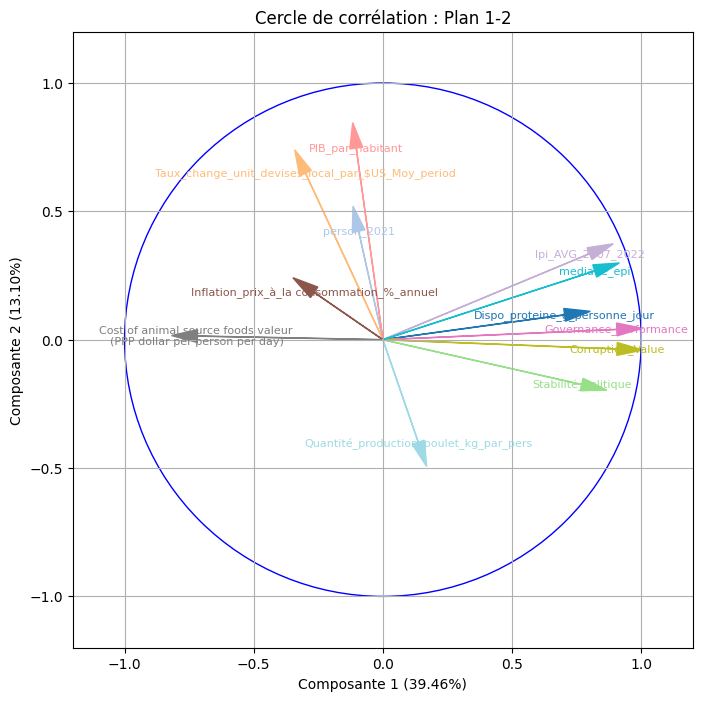

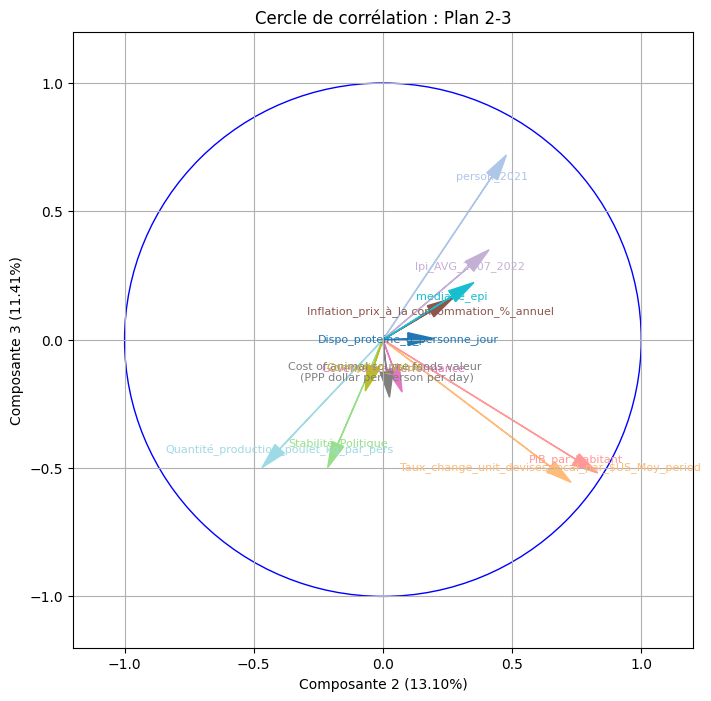

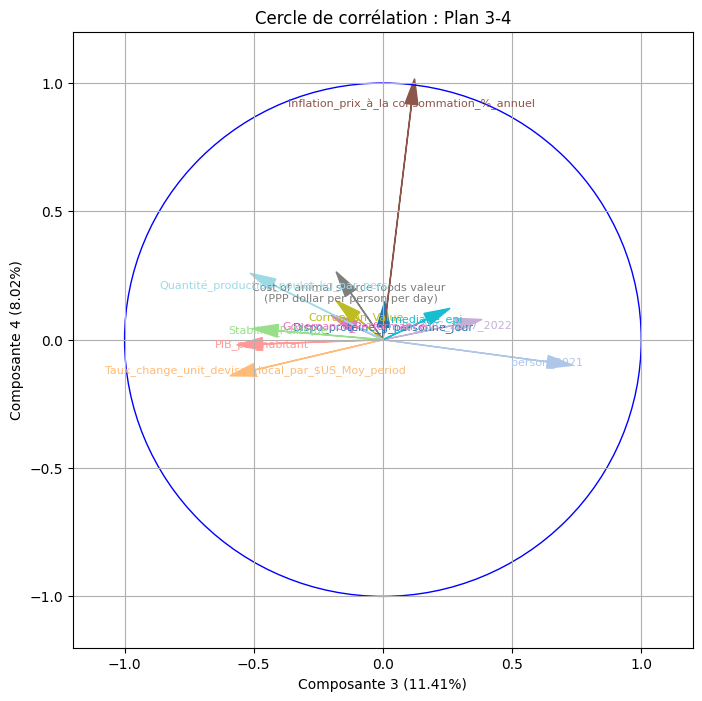

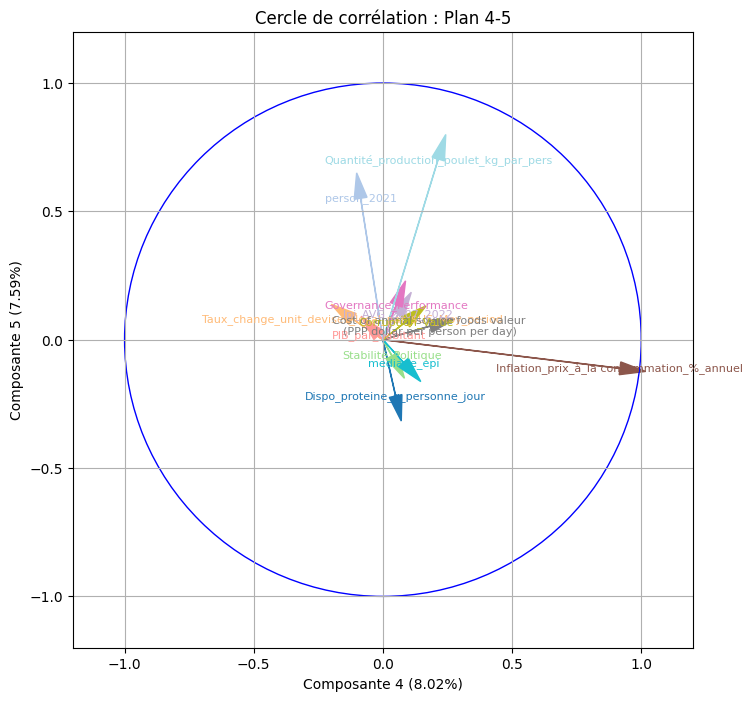

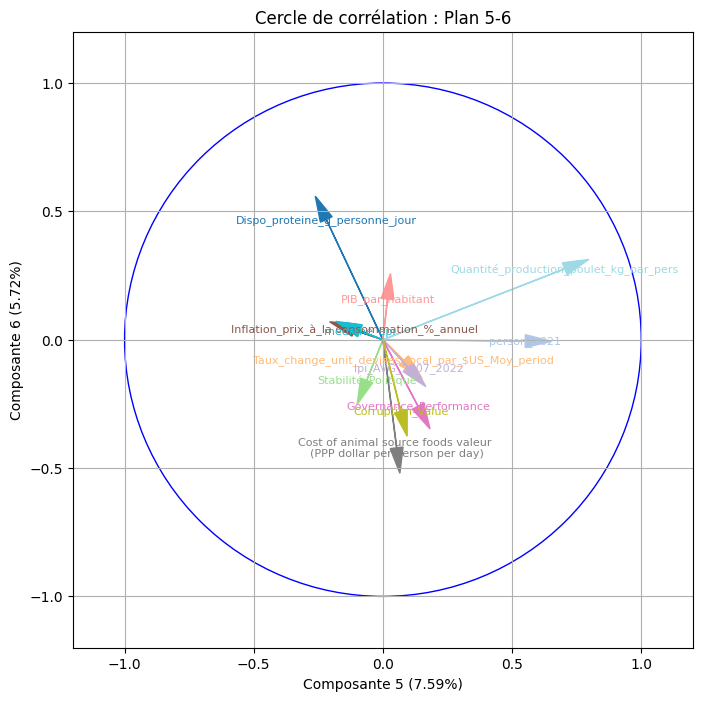

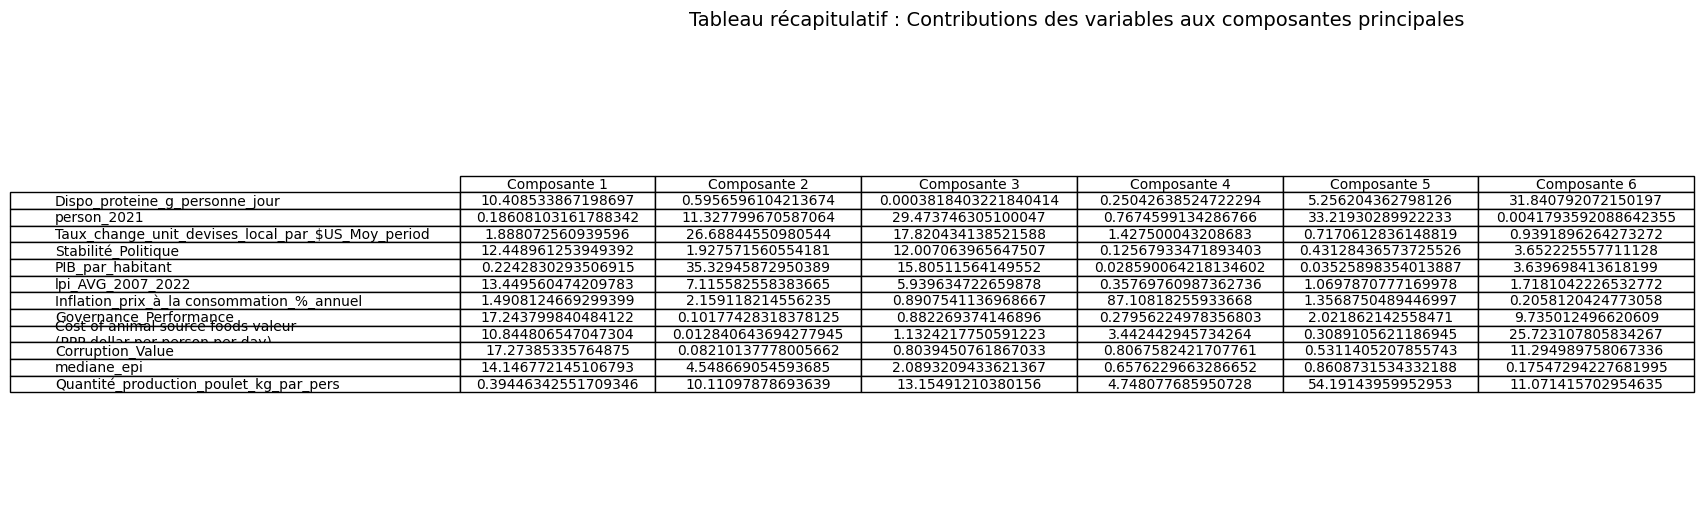

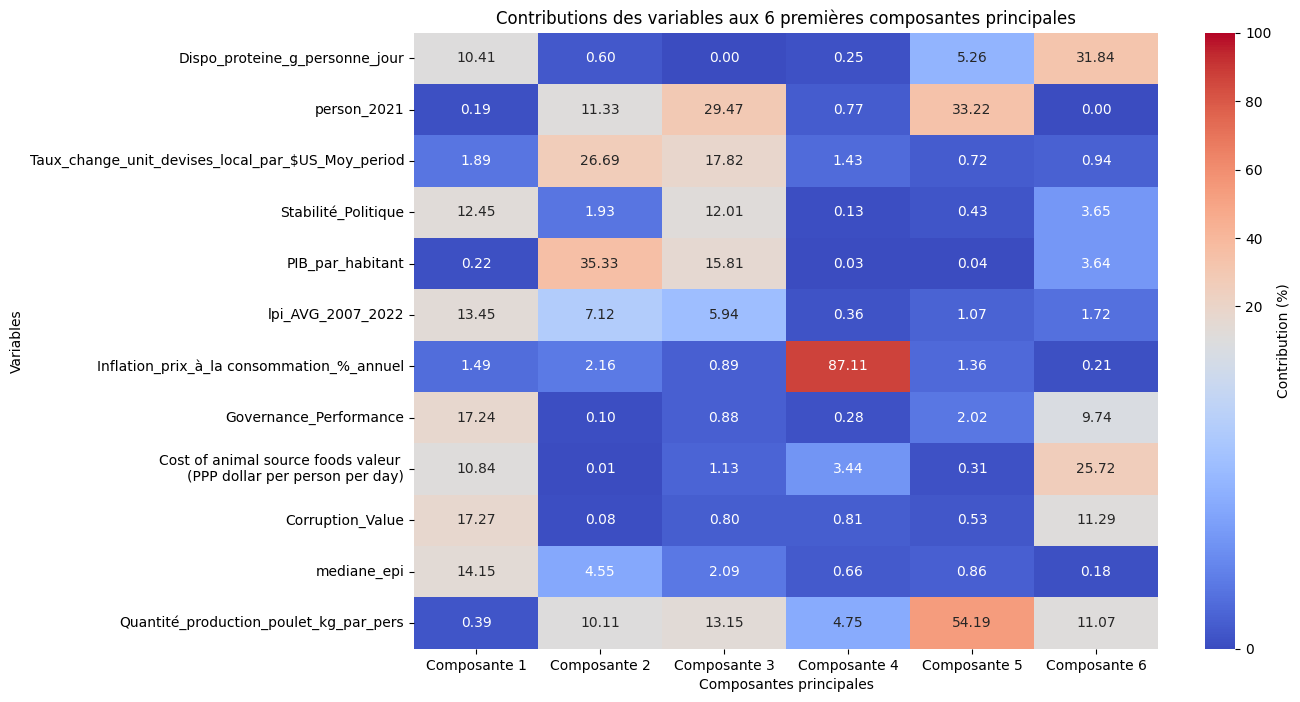

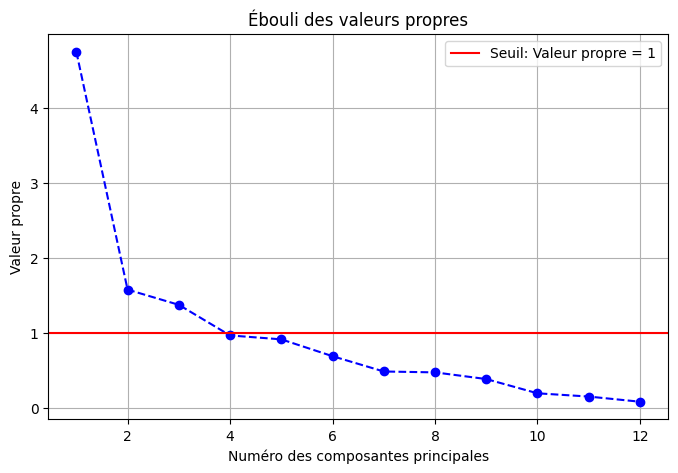

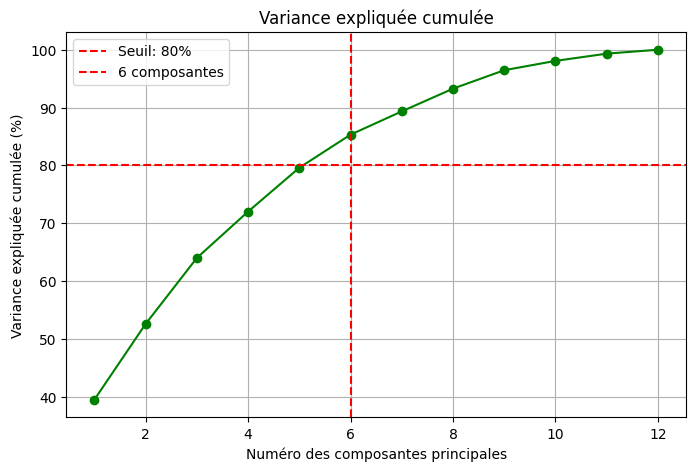

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np


# 1. Imputation des valeurs manquantes avec  médiane
imputer = SimpleImputer(strategy='median')
variables = df.drop(columns=['num_pays', 'code_pays', 'pays'])
variables_imputed = imputer.fit_transform(variables)

# 2. Standardisation des données
x = StandardScaler().fit_transform(variables_imputed)
# Standardisation des données
x = StandardScaler().fit_transform(variables.values)

# Application de l'ACP complète
pca = PCA()
components = pca.fit_transform(x)

# Extraction des informations de variance expliquée
explained_variance_ratio = pca.explained_variance_ratio_ * 100
cumulative_variance = explained_variance_ratio.cumsum()

# Déterminer le nombre minimal de plans nécessaires pour atteindre 80 % de variance expliquée
num_components_for_80 = np.argmax(cumulative_variance >= 80) + 1
print(f"Nombre de composantes nécessaires pour atteindre 80% de variance : {num_components_for_80}")

# ==================== Visualisation des plans factoriels ====================

for i in range(num_components_for_80 - 1):
    comp1, comp2 = i, i + 1

    # Charges (loadings) pour les deux composantes
    loadings = pca.components_.T[:, [comp1, comp2]] * np.sqrt(pca.explained_variance_[[comp1, comp2]])

    # Création du graphique
    fig, ax = plt.subplots(figsize=(8, 8))
    colors = plt.cm.tab20(np.linspace(0, 1, len(variables.columns)))

    # Affichage des vecteurs (variables)
    for j, (x, y) in enumerate(loadings):
        ax.arrow(0, 0, x, y, head_width=0.05, head_length=0.1, color=colors[j])
        ax.text(x, y, variables.columns[j], color=colors[j], fontsize=8, ha='center', va='center')

    # Cercle de corrélation
    circle = plt.Circle((0, 0), 1, color='blue', fill=False)
    ax.add_artist(circle)

    # Réglages des axes
    ax.set_xlim([-1.2, 1.2])
    ax.set_ylim([-1.2, 1.2])
    ax.set_xlabel(f'Composante {comp1 + 1} ({explained_variance_ratio[comp1]:.2f}%)')
    ax.set_ylabel(f'Composante {comp2 + 1} ({explained_variance_ratio[comp2]:.2f}%)')
    ax.set_title(f'Cercle de corrélation : Plan {comp1 + 1}-{comp2 + 1}')

    plt.grid()
    plt.show()

# ==================== Contribution des variables ====================
 # Contributions en pourcentage pour chaque composante
contributions = (pca.components_**2).T * 100
contributions_df = pd.DataFrame(
    contributions,
    index=variables.columns,
    columns=[f'Composante {i + 1}' for i in range(len(contributions[0]))]
)

# Affichage des contributions sous forme de tableau avec matplotlib
def plot_table(data, title, figsize=(12, 6)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=data.values,
                     colLabels=data.columns,
                     rowLabels=data.index,
                     cellLoc='center',
                     loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(data.columns))))
    plt.title(title, fontsize=14, pad=20)
    plt.show()

# Afficher le tableau pour les premières composantes principales nécessaires
columns_to_display = [f'Composante {i + 1}' for i in range(num_components_for_80)]
plot_table(contributions_df[columns_to_display],
           title="Tableau récapitulatif : Contributions des variables aux composantes principales")


# ==================================Visualisation des contributions (heatmap)==================

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

# Visualisation des contributions (heatmap)
plt.figure(figsize=(12, 8))

# Définir une norme où 10% est le seuil de transition vers des couleurs chaudes
norm = TwoSlopeNorm(vmin=0, vcenter=10, vmax=100)

sns.heatmap(
    contributions_df.iloc[:, :num_components_for_80],
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={'label': 'Contribution (%)'},
    norm=norm  # Utilisation de la norme personnalisée
)

plt.title(f"Contributions des variables aux {num_components_for_80} premières composantes principales")
plt.xlabel("Composantes principales")
plt.ylabel("Variables")
plt.show()



# ==================== Ébouli des valeurs propres et variance cumulée ====================

# Ébouli des valeurs propres
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o', linestyle='--', color='b')
plt.title('Ébouli des valeurs propres')
plt.xlabel('Numéro des composantes principales')
plt.ylabel('Valeur propre')
plt.axhline(y=1, color='r', linestyle='-', label='Seuil: Valeur propre = 1')
plt.legend()
plt.grid()
plt.show()

# Variance expliquée cumulée
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='g')
plt.title('Variance expliquée cumulée')
plt.xlabel('Numéro des composantes principales')
plt.ylabel('Variance expliquée cumulée (%)')
plt.axhline(y=80, color='r', linestyle='--', label='Seuil: 80%')
plt.axvline(x=num_components_for_80, color='r', linestyle='--', label=f'{num_components_for_80} composantes')
plt.legend()
plt.grid()
plt.show()


Nombre de composantes nécessaires pour atteindre 80% de variance : 6


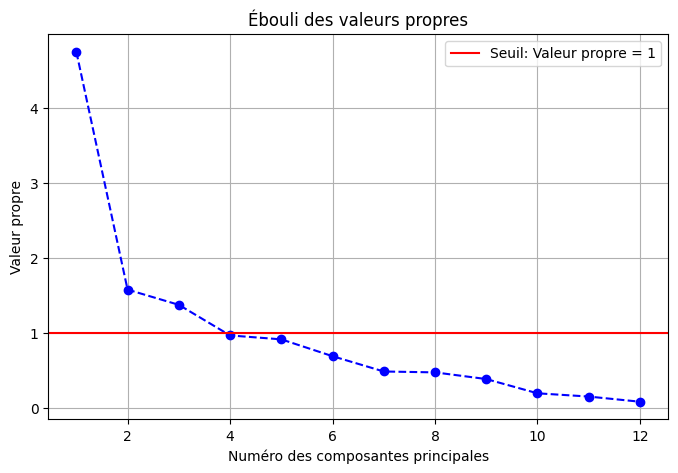

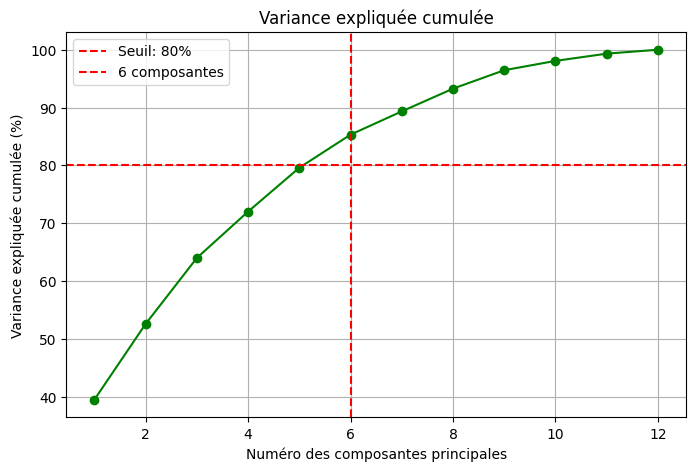

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# 1. Imputation des valeurs manquantes avec la médiane
imputer = SimpleImputer(strategy='median')
variables = df.drop(columns=['num_pays', 'code_pays', 'pays'])
variables_imputed = imputer.fit_transform(variables)

# 2. Standardisation des données
x = StandardScaler().fit_transform(variables_imputed)

# 3. Application de l'ACP complète
pca = PCA()
pca.fit(x)

# 4. Extraction des informations de variance expliquée
explained_variance_ratio = pca.explained_variance_ratio_ * 100
cumulative_variance = explained_variance_ratio.cumsum()

# 5. Déterminer le nombre de composantes principales nécessaires pour atteindre 80 % de variance
num_components_for_80 = np.argmax(cumulative_variance >= 80) + 1
print(f"Nombre de composantes nécessaires pour atteindre 80% de variance : {num_components_for_80}")

# ==================== Diagramme des éboulis ====================

# Ébouli des valeurs propres
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o', linestyle='--', color='b')
plt.title('Ébouli des valeurs propres')
plt.xlabel('Numéro des composantes principales')
plt.ylabel('Valeur propre')
plt.axhline(y=1, color='r', linestyle='-', label='Seuil: Valeur propre = 1')
plt.legend()
plt.grid()
plt.show()

# Variance expliquée cumulée
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='g')
plt.title('Variance expliquée cumulée')
plt.xlabel('Numéro des composantes principales')
plt.ylabel('Variance expliquée cumulée (%)')
plt.axhline(y=80, color='r', linestyle='--', label='Seuil: 80%')
plt.axvline(x=num_components_for_80, color='r', linestyle='--', label=f'{num_components_for_80} composantes')
plt.legend()
plt.grid()
plt.show()


# **Ebouli des valeurs propre**

# Pour atteindre un seuil de 80% de la variance il nous faut 6 composantes principales et donc 5 Plan factoriels.

Nombre de composantes nécessaires pour atteindre 80% de variance : 6


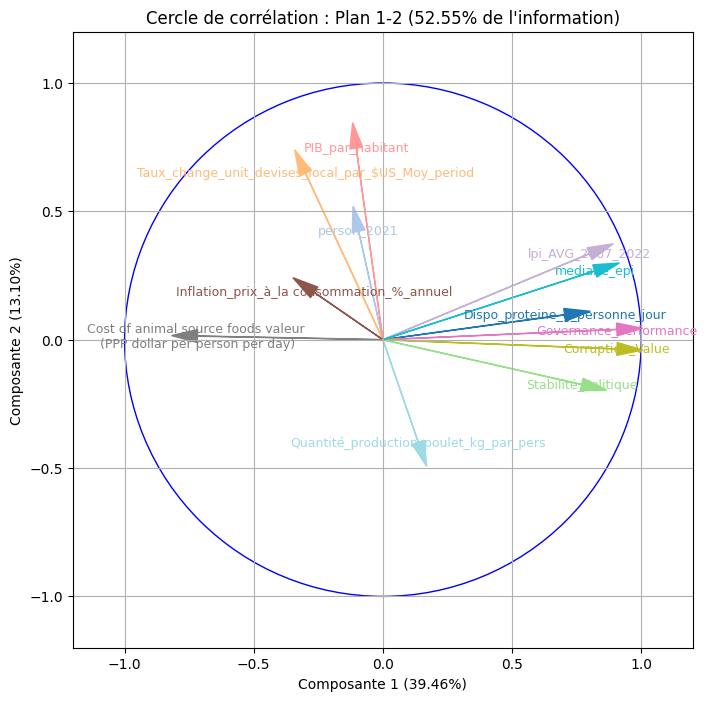

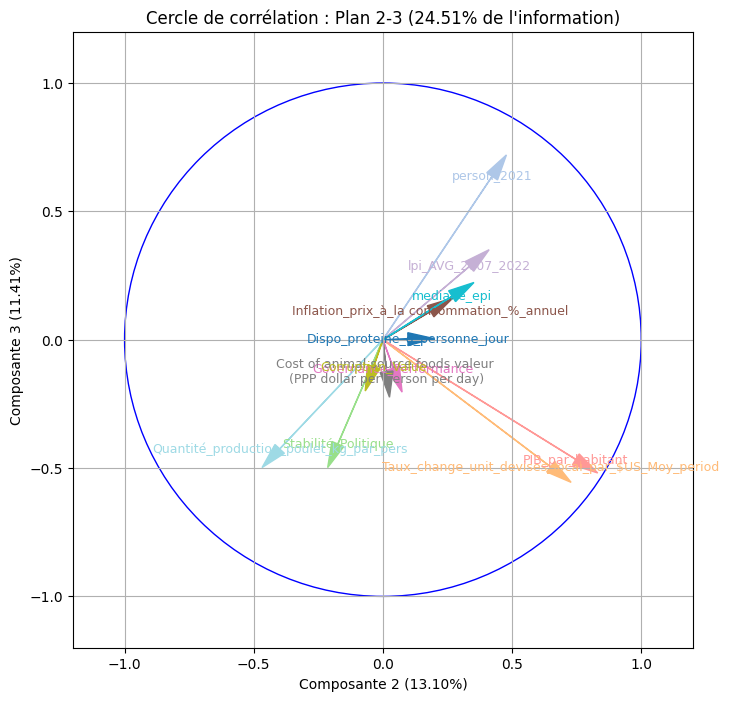

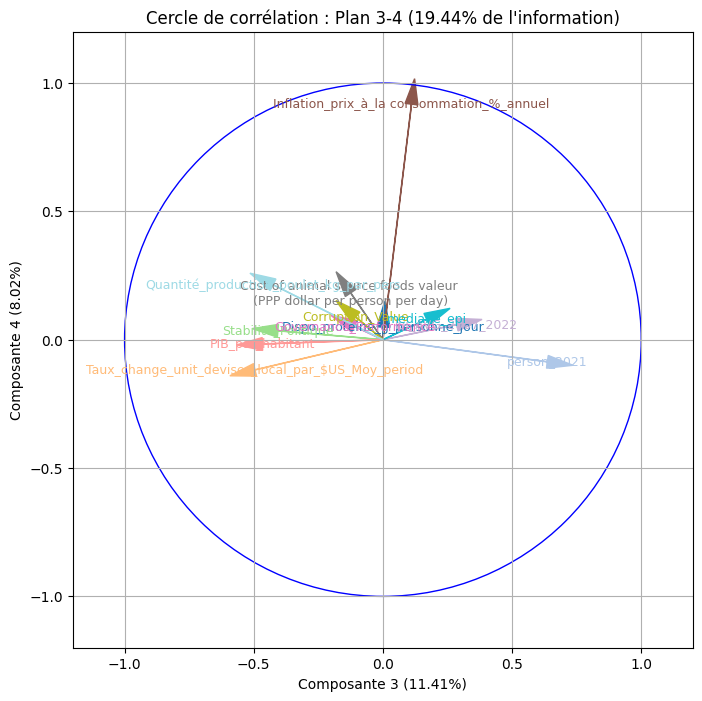

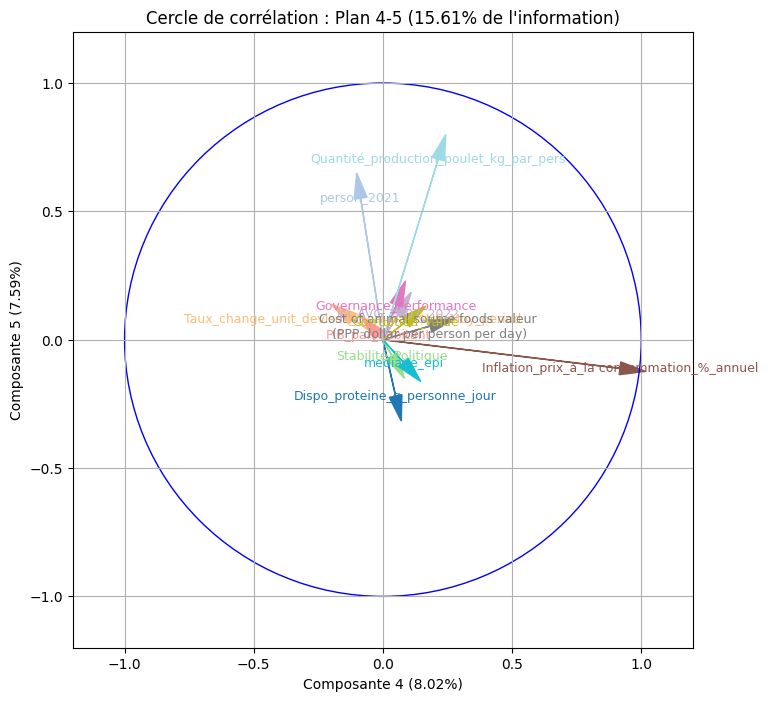

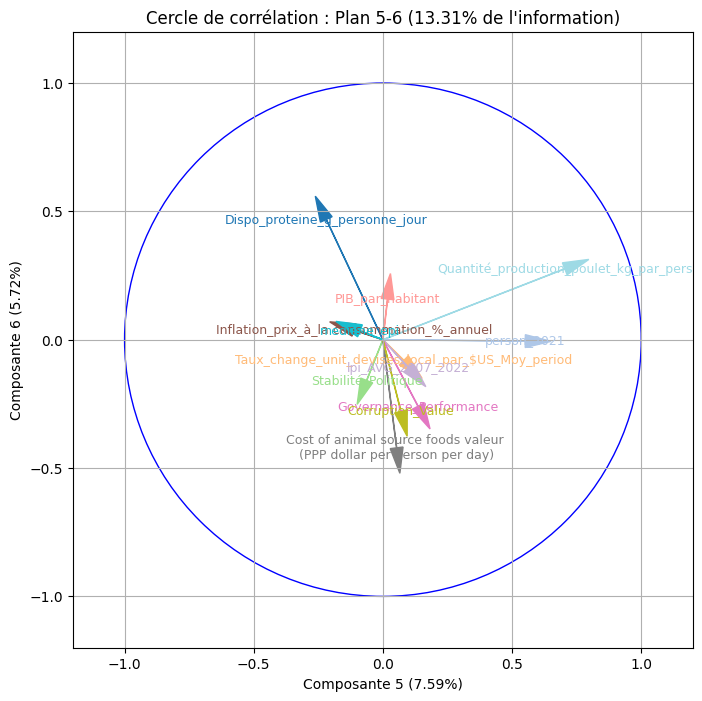

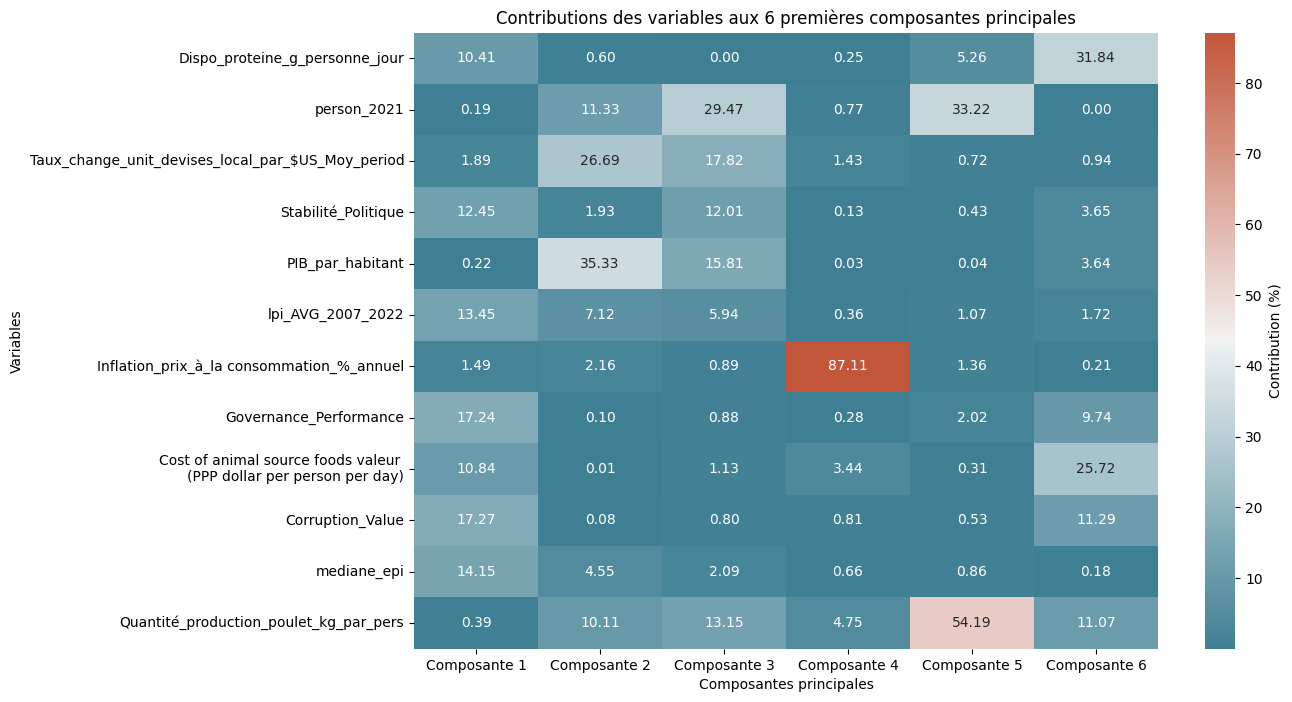

In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Imputation des valeurs manquantes avec la médiane
imputer = SimpleImputer(strategy='median')
variables = df.drop(columns=['num_pays', 'code_pays', 'pays'])
variables_imputed = imputer.fit_transform(variables)

# 2. Standardisation des données
x = StandardScaler().fit_transform(variables_imputed)

# 3. Application de l'ACP complète
pca = PCA()
pca.fit(x)

# 4. Extraction des informations de variance expliquée
explained_variance_ratio = pca.explained_variance_ratio_ * 100
cumulative_variance = explained_variance_ratio.cumsum()

# 5. Déterminer le nombre de composantes principales nécessaires pour atteindre 80 % de variance
num_components_for_80 = np.argmax(cumulative_variance >= 80) + 1
print(f"Nombre de composantes nécessaires pour atteindre 80% de variance : {num_components_for_80}")

# ==================== Cercles de corrélation pour les plans factoriels ====================

for i in range(num_components_for_80 - 1):
    comp1, comp2 = i, i + 1

    # Charges (loadings) pour les deux composantes
    loadings = pca.components_.T[:, [comp1, comp2]] * np.sqrt(pca.explained_variance_[[comp1, comp2]])

    # Contribution des deux composantes au total
    comp1_contrib = explained_variance_ratio[comp1]
    comp2_contrib = explained_variance_ratio[comp2]
    total_contrib = comp1_contrib + comp2_contrib

    # Création du graphique
    fig, ax = plt.subplots(figsize=(8, 8))
    colors = plt.cm.tab20(np.linspace(0, 1, len(variables.columns)))

    # Affichage des vecteurs (variables)
    for j, (x, y) in enumerate(loadings):
        ax.arrow(0, 0, x, y, head_width=0.05, head_length=0.1, color=colors[j])
        ax.text(x, y, variables.columns[j], color=colors[j], fontsize=9, ha='center', va='center')

    # Cercle de corrélation
    circle = plt.Circle((0, 0), 1, color='blue', fill=False)
    ax.add_artist(circle)

    # Réglages des axes
    ax.set_xlim([-1.2, 1.2])
    ax.set_ylim([-1.2, 1.2])
    ax.set_xlabel(f'Composante {comp1 + 1} ({comp1_contrib:.2f}%)')
    ax.set_ylabel(f'Composante {comp2 + 1} ({comp2_contrib:.2f}%)')
    ax.set_title(f'Cercle de corrélation : Plan {comp1 + 1}-{comp2 + 1} ({total_contrib:.2f}% de l\'information)')

    plt.grid()
    plt.show()

# ==================== Contributions des variables aux composantes étudiées ====================

# Contributions en pourcentage pour chaque composante
contributions = (pca.components_**2).T * 100
contributions_df = pd.DataFrame(
    contributions,
    index=variables.columns,
    columns=[f'Composante {i + 1}' for i in range(len(contributions[0]))]
)

# Visualisation des contributions (heatmap)
plt.figure(figsize=(12, 8))

# Définir une norme où 10% est le seuil de transition vers des couleurs chaudes
norm = sns.diverging_palette(220, 20, as_cmap=True)

sns.heatmap(
    contributions_df.iloc[:, :num_components_for_80],
    annot=True,
    fmt=".2f",
    cmap=norm,
    cbar_kws={'label': 'Contribution (%)'}
)

plt.title(f"Contributions des variables aux {num_components_for_80} premières composantes principales")
plt.xlabel("Composantes principales")
plt.ylabel("Variables")
plt.show()


# **Construction du Dendogramme**


Sur le dendrogramme, la distance est représentée par l’axe des ordonnées (l'axe vertical). La hauteur des fusions entre les clusters indique le niveau de dissimilarité :

- Petite distance : Deux clusters sont très similaires (ou deux pays sont très similaires si la fusion est entre deux pays individuels).

- Grande distance : Deux clusters sont très différents. Une grande distance suggère que les clusters se regroupent seulement parce qu'il n'y a pas d'autre option, ce qui peut indiquer des groupes naturellement distincts.



La ligne rouge plt.axhline(y=optimal_distance, color='r', linestyle='--') est ajoutée pour marquer visuellement la coupure optimale dans le dendrogramme.
Affichage du nombre de clusters :

len(set(clusters)) donne le nombre de clusters détectés à cette coupure optimale.

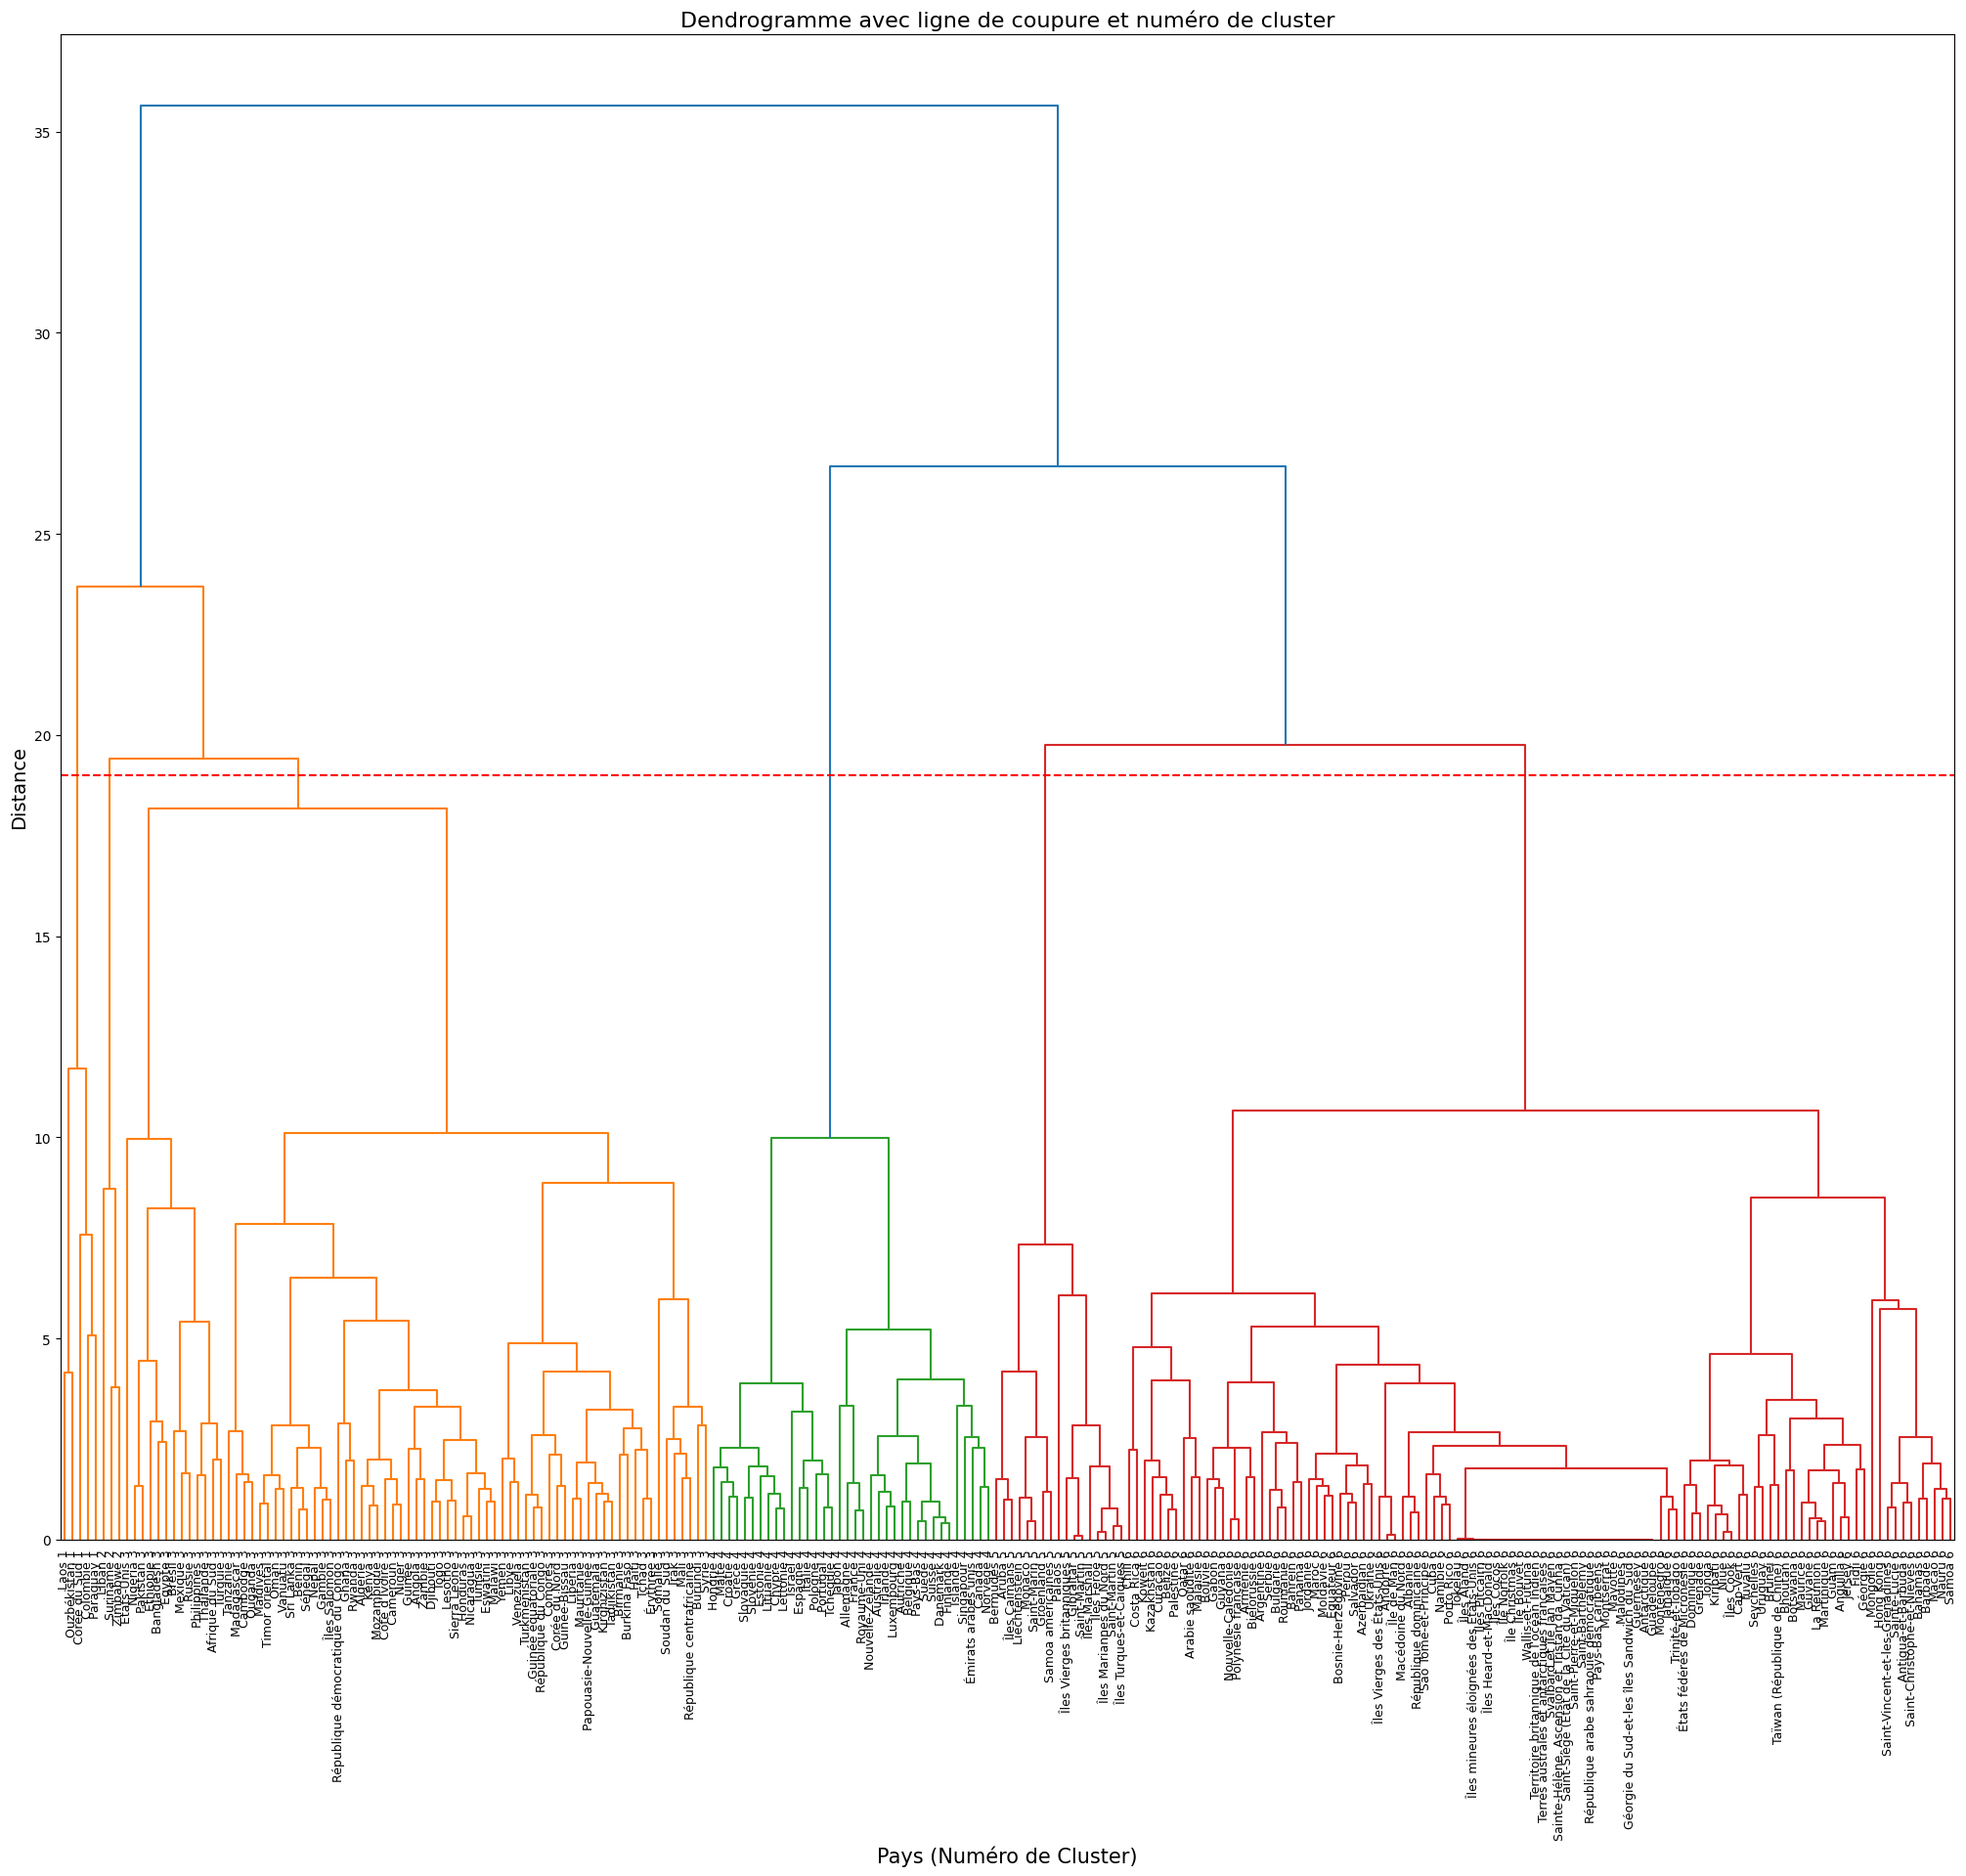

Nombre optimal de clusters : 6
Indice de silhouette : 0.2843


In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score

# 1. Sélection des colonnes pertinentes pour l'ACP (excluant les colonnes spécifiques aux pays)
variables = df.drop(columns=['num_pays', 'code_pays', 'pays'])

# 2. Imputation des valeurs manquantes par 0
variables.fillna(0, inplace=True)

# 3. Standardisation des données
x = variables.values
x = StandardScaler().fit_transform(x)

# Obtenir les noms des pays
country_names = df['pays'].values

# Création du linkage pour le clustering hiérarchique
linkage_matrix = sch.linkage(x, method='ward')

# 4. Fixer la distance de coupure à 19
optimal_distance = 19  # Fixer explicitement la distance optimale de coupure

# Extraction des clusters en utilisant cette coupure fixe
clusters = fcluster(linkage_matrix, optimal_distance, criterion='distance')

# Ajouter les clusters aux noms des pays pour les afficher dans le dendrogramme
country_labels = [f"{name} {cluster}" for name, cluster in zip(country_names, clusters)]

# Création du dendrogramme avec les noms des pays incluant les numéros de clusters
plt.figure(figsize=(25, 20))
dendrogram = sch.dendrogram(linkage_matrix,
                            labels=country_labels,
                            leaf_font_size=9)

# Ligne de coupure pour visualiser le nombre optimal de clusters
plt.axhline(y=optimal_distance, color='r', linestyle='--')  # Ligne rouge pour la coupure optimale à 10
plt.title('Dendrogramme avec ligne de coupure et numéro de cluster', fontsize=16)
plt.xlabel('Pays (Numéro de Cluster)', fontsize=15)
plt.ylabel('Distance', fontsize=14)
plt.show()

# Affichage du nombre de clusters
print(f"Nombre optimal de clusters : {len(set(clusters))}")

# 5. Calcul de l'indice de silhouette
silhouette_avg = silhouette_score(x, clusters)
print(f"Indice de silhouette : {silhouette_avg:.4f}")




# **Clustering & réduction en 2D avec ACP**
**Determination du Nombre de Cluster optimal avec 'Elbow Method'**

**K-means clustering with the optimal number of clusters**

**Ajout des centroides**

# **Comparaison entre deux méthodes de Clustering K-Means et DBSCAN**
# **Vérification de la performance avec l'indice de silhouette**

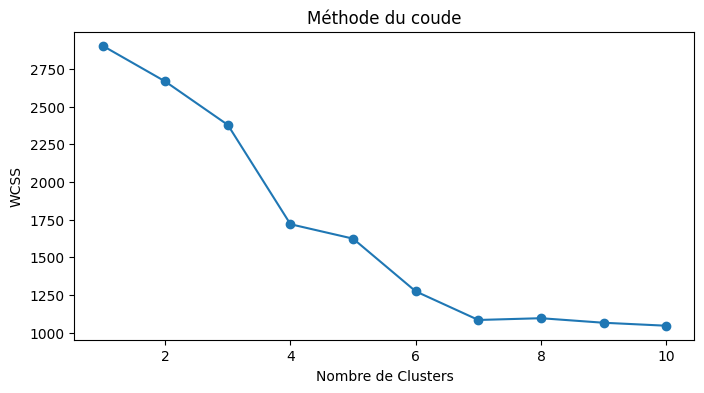

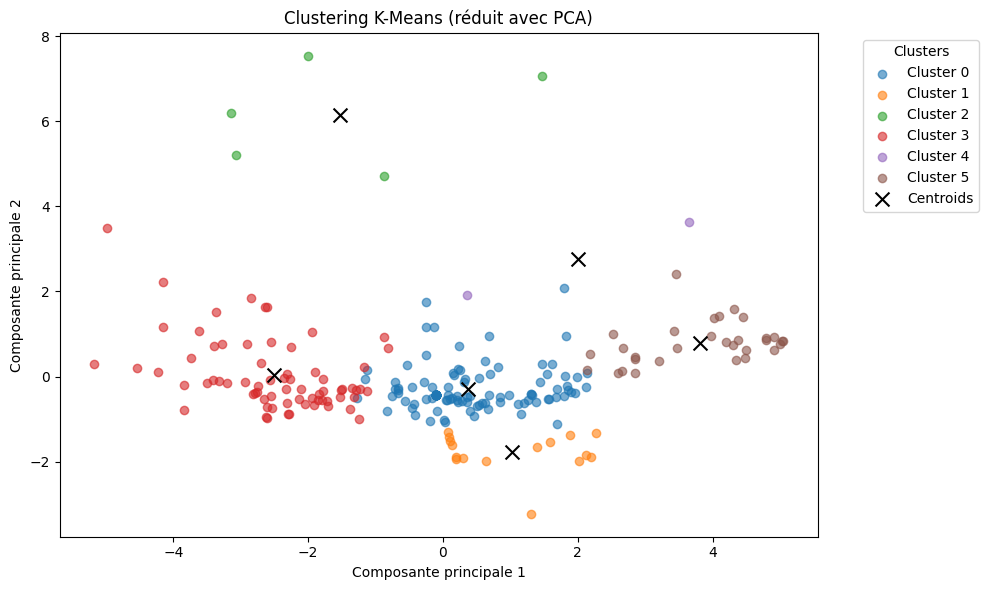


Résumé des indices de silhouette :
- K-Means : 0.31
- DBSCAN  : -0.15

Pays dans le Cluster 0:
['Afrique du Sud', 'Albanie', 'Andorre', 'Anguilla', 'Antarctique', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine', 'Arménie', 'Aruba', 'Bahamas', 'Bahreïn', 'Barbade', 'Belize', 'Bhoutan', 'Biélorussie', 'Bolivie', 'Botswana', 'Brunei', 'Bulgarie', 'Cap-Vert', 'Chili', 'Chypre', 'Costa Rica', 'Croatie', 'Cuba', 'Curaçao', 'Dominique', 'Fidji', 'Gabon', 'Grenade', 'Grèce', 'Guadeloupe', 'Guam', 'Guernesey', 'Guyana', 'Guyane', 'Géorgie', 'Géorgie du Sud-et-les îles Sandwich du Sud', 'Hongrie', 'Jamaïque', 'Jersey', 'Jordanie', 'Kazakhstan', 'Kiribati', 'Koweït', 'La Réunion', 'Lettonie', 'Macao', 'Macédoine du Nord', 'Malaisie', 'Maldives', 'Malouines', 'Malte', 'Maroc', 'Martinique', 'Maurice', 'Mayotte', 'Mexique', 'Moldavie', 'Mongolie', 'Montserrat', 'Monténégro', 'Namibie', 'Nauru', 'Niue', 'Nouvelle-Calédonie', 'Oman', 'Palestine', 'Panama', 'Pays-Bas caribéens', 'Polynésie franç

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# 1. Chargement des données (supposons que df est déjà défini)
# Exemple : df = pd.read_csv("data.csv")

# 2. Sélection des colonnes pertinentes pour le clustering (exclure les colonnes spécifiques au pays)
variables = df.drop(columns=['num_pays', 'code_pays', 'pays'])

# 3. Imputation des valeurs manquantes par la médiane de chaque colonne
imputer = SimpleImputer(strategy='median')
variables_imputed = imputer.fit_transform(variables)

# 4. Standardisation des données
x = StandardScaler().fit_transform(variables_imputed)

# 5. Déterminer le nombre optimal de clusters avec la méthode du coude pour K-Means
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Tracer la méthode du coude
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Méthode du coude')
plt.xlabel('Nombre de Clusters')
plt.ylabel('WCSS')
plt.show()

# 6. Appliquer K-Means avec le nombre optimal de clusters
optimal_k = 6  # Déterminé par la méthode du coude
kmeans = KMeans(n_clusters=optimal_k, random_state=42, init='k-means++')
kmeans_labels = kmeans.fit_predict(x)

# Calcul de l'indice de silhouette pour K-Means
silhouette_kmeans = silhouette_score(x, kmeans_labels)

# 7. Appliquer DBSCAN
dbscan = DBSCAN(eps=1, min_samples=6)  # Paramètres par défaut, ajustez eps et min_samples
dbscan_labels = dbscan.fit_predict(x)

# Calcul de l'indice de silhouette pour DBSCAN (uniquement si des clusters sont trouvés)
if len(set(dbscan_labels)) > 1:  # Éviter une erreur si DBSCAN classe tout comme "bruit"
    silhouette_dbscan = silhouette_score(x, dbscan_labels)
else:
    silhouette_dbscan = -1  # Aucun cluster significatif trouvé


# 9. Réduction de la dimension avec PCA pour visualiser les clusters
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['composante principale 1', 'composante principale 2'])

# Ajouter les labels des clusters au DataFrame
finalDf = pd.concat([df[['pays']], pd.DataFrame({'kmeans_cluster': kmeans_labels,
                                                 'dbscan_cluster': dbscan_labels})], axis=1)
finalDf = pd.concat([finalDf, principalDf], axis=1)

# 10. Visualiser les résultats pour K-Means
plt.figure(figsize=(10, 6))
for cluster_num in range(optimal_k):
    clustered_data = finalDf[finalDf['kmeans_cluster'] == cluster_num]
    plt.scatter(clustered_data['composante principale 1'], clustered_data['composante principale 2'],
                label=f'Cluster {cluster_num}', alpha=0.6)
plt.title('Clustering K-Means (réduit avec PCA)')
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1],
            c='black', marker='x', s=100, label='Centroids')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 11. Résumé des indices de silhouette
print("\nRésumé des indices de silhouette :")
print(f"- K-Means : {silhouette_kmeans:.2f}")
print(f"- DBSCAN  : {silhouette_dbscan:.2f}")

# 9. Afficher les pays dans chaque cluster
for cluster_num in range(optimal_k):
    countries_in_cluster = finalDf[finalDf['kmeans_cluster'] == cluster_num]['pays'].tolist()
    print(f"\nPays dans le Cluster {cluster_num}:")
    print(countries_in_cluster)



# **Analyse des Clusters avec K-Means**

**Méthode du Coude :** Le premier graphique montre la "Méthode du coude" pour déterminer le nombre optimal de clusters. La courbe indique une réduction progressive de la somme des carrés des distances aux centres (WCSS) jusqu'à environ 6 clusters, où la pente devient plus douce. Cela signifie que 6 clusters pourraient être un bon choix pour représenter les groupes de pays.

**Répartition des Clusters :**
Le deuxième graphique montre la distribution des pays en fonction des deux premières composantes principales, avec les différents clusters colorés. Ces clusters sont centrés autour de six points distincts (centroïdes en noir) dans l'espace réduit par l'ACP, permettant de visualiser les principales similarités entre les pays.

Les pays situés dans le même cluster ont des profils économiques, logistiques, ou environnementaux similaires selon les indicateurs sélectionnés.
Les pays proches des centroïdes sont représentatifs de leurs clusters, tandis que ceux plus éloignés peuvent être plus atypiques.

Pour déterminer les clusters les plus propices à l'exportation du poulet français, nous devons prendre en compte plusieurs facteurs, tels que :

 * Le pouvoir d'achat : Représenté par le PIB par habitant ou la prospérité économique des pays du cluster, permettant de s'assurer qu'ils peuvent acheter des produits importés.
 * La logistique et la facilité d'accès : Un indice logistique (LPI) élevé ou des infrastructures développées faciliteraient l'importation et la distribution.
 * La stabilité politique et la corruption : Les pays stables et avec un faible niveau de corruption sont plus sûrs pour les entreprises étrangères.

# **Analyse des Clusters**



# **Analyse des clusters avec boxplot**

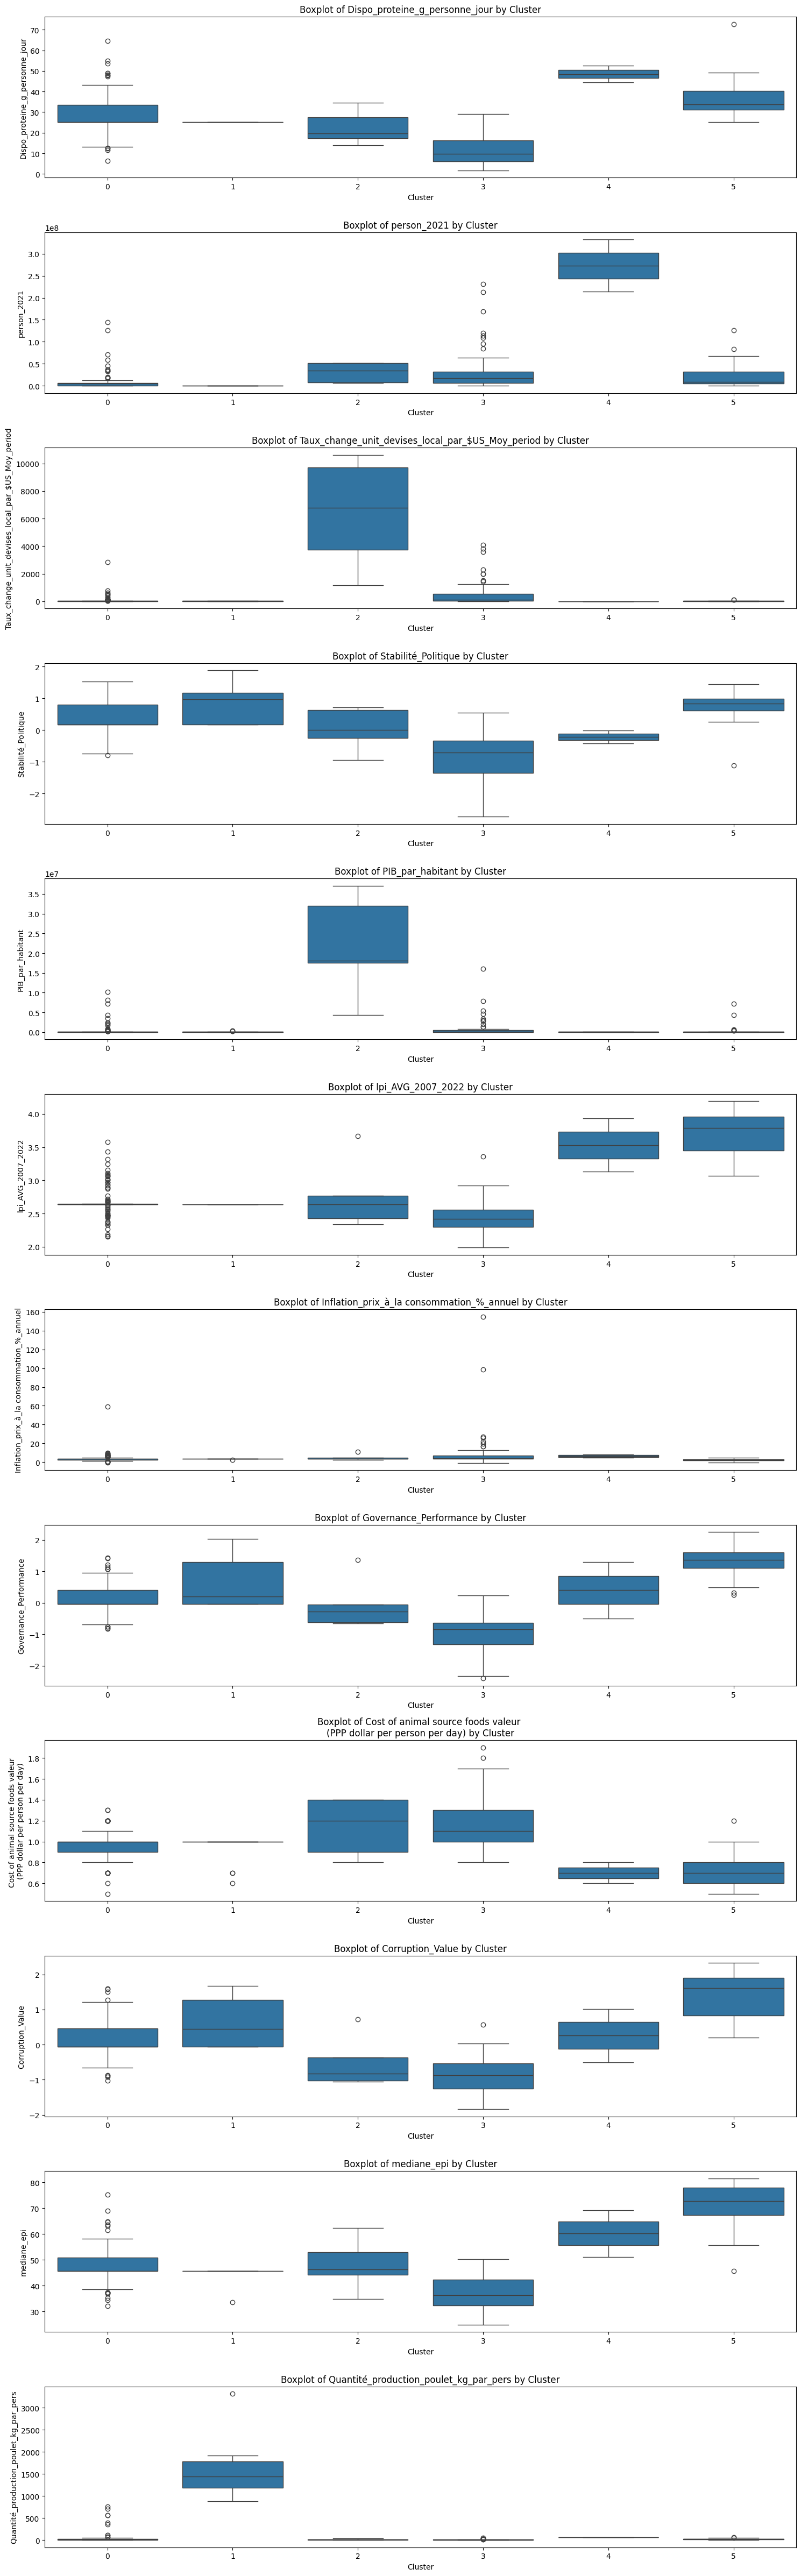


Countries in Cluster 0:
['Afrique du Sud', 'Albanie', 'Andorre', 'Anguilla', 'Antarctique', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine', 'Arménie', 'Aruba', 'Bahamas', 'Bahreïn', 'Barbade', 'Belize', 'Bhoutan', 'Biélorussie', 'Bolivie', 'Botswana', 'Brunei', 'Bulgarie', 'Cap-Vert', 'Chili', 'Chypre', 'Costa Rica', 'Croatie', 'Cuba', 'Curaçao', 'Dominique', 'Fidji', 'Gabon', 'Grenade', 'Grèce', 'Guadeloupe', 'Guam', 'Guernesey', 'Guyana', 'Guyane', 'Géorgie', 'Géorgie du Sud-et-les îles Sandwich du Sud', 'Hongrie', 'Jamaïque', 'Jersey', 'Jordanie', 'Kazakhstan', 'Kiribati', 'Koweït', 'La Réunion', 'Lettonie', 'Macao', 'Macédoine du Nord', 'Malaisie', 'Maldives', 'Malouines', 'Malte', 'Maroc', 'Martinique', 'Maurice', 'Mayotte', 'Mexique', 'Moldavie', 'Mongolie', 'Montserrat', 'Monténégro', 'Namibie', 'Nauru', 'Niue', 'Nouvelle-Calédonie', 'Oman', 'Palestine', 'Panama', 'Pays-Bas caribéens', 'Polynésie française', 'Porto Rico', 'Pérou', 'Qatar', 'Roumanie', 'Russie', 'Républiqu

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Ajouter les labels de clusters aux données originales
df['kmeans_cluster'] = kmeans.labels_

# 2. Tracer des boxplots pour chaque variable par cluster
# La liste des variables numériques (hors "pays", "code_pays", etc.)
numeric_columns = variables.columns

# Configurer la taille des figures pour la visualisation
plt.figure(figsize=(15, len(numeric_columns) * 4))

# Créer un boxplot pour chaque variable
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.boxplot(x='kmeans_cluster', y=column, data=df)
    plt.title(f'Boxplot of {column} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

# Print countries in each cluster
for cluster_num in range(optimal_k):
    countries_in_cluster = finalDf[finalDf['kmeans_cluster'] == cluster_num]['pays'].tolist()
    print(f"\nCountries in Cluster {cluster_num}:")
    print(countries_in_cluster)


In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import plotly.express as px

# 1. Imputation des valeurs manquantes avec la médiane
imputer = SimpleImputer(strategy='median')
variables = df.drop(columns=['num_pays', 'code_pays', 'pays'])
variables_imputed = imputer.fit_transform(variables)

# 2. Standardisation des données
x = StandardScaler().fit_transform(variables_imputed)

# 3. Application de l'ACP complète
pca = PCA()
components = pca.fit_transform(x)

# 4. Extraction des informations de variance expliquée
explained_variance_ratio = pca.explained_variance_ratio_ * 100
cumulative_variance = explained_variance_ratio.cumsum()

# 5. Déterminer le nombre de composantes principales nécessaires pour atteindre 80 % de variance
num_components_for_80 = np.argmax(cumulative_variance >= 80) + 1
print(f"Nombre de composantes nécessaires pour atteindre 80% de variance : {num_components_for_80}")

# ==================== Visualisation en 3D des composantes principales avec Plotly ====================

# ==================== Application du clustering K-Means ====================

# 6. Calcul du nombre optimal de clusters avec la méthode du coude
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(components[:, :6])
    inertia.append(kmeans.inertia_)

# 7. Application du K-Means avec 6 clusters (résultat de la méthode du coude)
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(components[:, :6])  # Utiliser les 6 premières composantes pour le clustering

# Ajout des clusters dans les données
df['cluster'] = clusters

# Visualisation du clustering en 3D
fig = px.scatter_3d(
    df,  # Pass the DataFrame here
    x=components[:, 0],
    y=components[:, 1],
    z=components[:, 2],
    color=clusters.astype(str),  # Ajouter la couleur en fonction des clusters
    title=f'Clustering K-Means sur Composantes 1, 2 et 3',
    labels={'x': f'Composante 1 ({explained_variance_ratio[0]:.2f}%)',
            'y': f'Composante 2 ({explained_variance_ratio[1]:.2f}%)',
            'z': f'Composante 3 ({explained_variance_ratio[2]:.2f}%)'},
    opacity=0.6,
    hover_data={'pays': True}  # Display 'pays' column on hover
)

fig.update_layout(
    width=1200,  # Largeur du graphique
    height=900,  # Hauteur du graphique
)

fig.update_traces(marker=dict(size=5))
fig.show()

# ==================== Visualisation du clustering sur les composantes 4, 5 et 6 ====================

# Deuxième graphique : Clustering sur les composantes 4, 5 et 6
fig = px.scatter_3d(
    df,
    x=components[:, 3],
    y=components[:, 4],
    z=components[:, 5],
    color=clusters.astype(str),  # Ajouter la couleur en fonction des clusters
    title=f'Clustering K-Means sur Composantes 4, 5 et 6',
    labels={'x': f'Composante 4 ({explained_variance_ratio[3]:.2f}%)',
            'y': f'Composante 5 ({explained_variance_ratio[4]:.2f}%)',
            'z': f'Composante 6 ({explained_variance_ratio[5]:.2f}%)'},
    opacity=0.6,
    hover_data={'pays': True} # Afficher le pays au survol
)

fig.update_layout(
    width=1200,  # Largeur du graphique
    height=900,  # Hauteur du graphique
)

fig.update_traces(marker=dict(size=5))
fig.show()



Nombre de composantes nécessaires pour atteindre 80% de variance : 6


#**Meilleur Cluster : 5**
Le Cluster 5
Le meilleur choix pour l'exportation du poulet français. Il combine une forte consommation de protéines, une population relativement importante, et un bon PIB. Ce cluster contient des pays développés ou émergents économiquement stables, qui sont généralement favorables aux importations de produits alimentaires de qualité.

**TOP 5**
* **États-Unis**

* **Allemagne**

* **Japon**

* **Royaume-Uni**

* **Pays-Bas**